# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: gradient boost classifier
2. Accuracy Score: 98.4%
3. Cross Validation Score: 
4. Final Accuracy Score(After Hyperparamter Tunning): 98.43%
5. RMSE:
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROBLEM STATEMENT(Zomato Restaurant Project)

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets
Downlaod Files:
https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.



# PROJECT CONTENTS
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Descriptive Analysis
 - 2.4:Observations
- Step 3: Exploratory Data Analysis
 - 3.1:Normal Distribution Check
 - 3.2:Scatter Plot Check
 - 3.3:Correlation Check
 - 3.4:Outlier Check
 - 3.5:Skewness Check
 - 3.6:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Arbitrary cutt-off of Target Variable
 - 4.3:Rechecking the current Relationship btw Variable
 - 4.4:Dropping of Features that strongly promotes multicollinearity(VIF)
 - 4.5:Removal of Outliers
 - 4.6:Transforming Data to Remove Skewness using Power transformation
 - 4.7:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:DecisionTree Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# Step 1 - ATTRIBUTES OF VARIABLES

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

 Country code
 Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the

following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –

1) Average Cost for two
2) Price range

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRFRegressor
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2,f_regression
import pickle
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [4]:
#Load dataset
df1=pd.read_csv('countrycode.csv')
df1

,Unnamed: 0,Country Code,Country
0,0,1,India
1,1,14,Australia
2,2,30,Brazil
3,3,37,Canada
4,4,94,Indonesia
5,5,148,New Zealand
6,6,162,Phillipines
7,7,166,Qatar
8,8,184,Singapore
9,9,189,South Africa


In [5]:
# load the other dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin1')


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df2

In [5]:
#lets merge the two datasets
df = pd.merge(df1,df2)

In [6]:
#checking the first five rows
df.head()

,Unnamed: 0,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,0,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,0,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,0,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,0,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
#checking the last five rows
df.tail()

,Unnamed: 0,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,14,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,14,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,14,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,14,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9550,14,216,United States,17559793,Fishpatrick's Crabby Cafe,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [8]:
#picking 4 random samples
df.sample(4)

,Unnamed: 0,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4775,0,1,India,312983,Tandoori Zaaika,New Delhi,"Main Road, Aaya Nagar, Near Honda Showroom, MG...",MG Road,"MG Road, New Delhi",77.128051,...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,4
2338,0,1,India,5890,Metro Grill,New Delhi,"4th Floor, City Centre Mall, Rohini, New Delhi","City Centre Mall, Rohini","City Centre Mall, Rohini, New Delhi",77.114223,...,Indian Rupees(Rs.),Yes,No,No,No,3,3.4,Orange,Average,134
3938,0,1,India,310758,Chopsuey,New Delhi,"7724, New Market, Near Liberty Cinema, Karol B...",Karol Bagh,"Karol Bagh, New Delhi",77.188909,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.2,Orange,Average,71
9409,14,216,United States,17582499,Royal Hotel,Pocatello,"11 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.012700,...,Dollar($),No,No,No,No,1,3.6,Yellow,Good,59


# Step 2.3 - Data Descriptive Analysis

In [9]:
#checking the data shape
df.shape

(9551, 23)

In [10]:
#lets drop the unnamed column.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
#checking for nature of datatypes
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [12]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [13]:
#Checking data full description
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [14]:
#lets check the columns
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
#Checking for null values
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
#Checking for null values
df.isnull().sum().sum()

9

In [17]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in Price range - ",Counter(df['Price range']))

The Value Counts in Price range -  Counter({1: 4444, 2: 3113, 3: 1408, 4: 586})


In [18]:
#Checking the count
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [19]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,15,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,India,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,8652,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [21]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [22]:
for category in categorical_columns:
    print(category)

Country
Restaurant Name
City
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating color
Rating text


In [23]:
#Checking the content of each Categorical columns
print("The Value Counts in Country- ",Counter(df['Country']))
print("The Value Counts in Restaurant Name - ",Counter(df['Restaurant Name']))
print("The Value Counts in City - ",Counter(df['City']))
print("The Value Counts in Address - ",Counter(df['Locality']))
print("The Value Counts in Locality - ",Counter(df['WindDir3pm']))
print("The Value Counts in Locality Verbose - ",Counter(df['Locality Verbose']))
print("The Value Counts in Cuisines - ",Counter(df['Cuisines']))
print("The Value Counts in Currency - ",Counter(df['Currency']))
print("The Value Counts in Location - ",Counter(df['Location']))
print("The Value Counts in Has Table booking - ",Counter(df['Has Table booking']))
print("The Value Counts in Is delivering now - ",Counter(df['Is delivering now']))
print("The Value Counts in Switch to order menu - ",Counter(df['Switch to order menu']))
print("The Value Counts in Rating color - ",Counter(df['Rating color']))
print("The Value Counts in Rating text - ",Counter(df['Rating text']))

The Value Counts in Country-  Counter({'India': 8652, 'United States': 434, 'United Kingdom': 80, 'Brazil': 60, 'South Africa': 60, 'UAE': 60, 'New Zealand': 40, 'Turkey': 34, 'Australia': 24, 'Phillipines': 22, 'Indonesia': 21, 'Qatar': 20, 'Singapore': 20, 'Sri Lanka': 20, 'Canada': 4})
The Value Counts in Restaurant Name -  Counter({'Cafe Coffee Day': 83, "Domino's Pizza": 79, 'Subway': 63, 'Green Chick Chop': 51, "McDonald's": 48, 'Keventers': 34, 'Pizza Hut': 30, 'Giani': 29, 'Baskin Robbins': 28, 'Barbeque Nation': 26, "Dunkin' Donuts": 22, "Giani's": 22, 'Barista': 22, 'Pind Balluchi': 20, 'Costa Coffee': 20, 'Sagar Ratna': 19, 'Twenty Four Seven': 19, 'Pizza Hut Delivery': 19, 'Wah Ji Wah': 19, 'KFC': 18, 'Republic of Chicken': 18, 'Chaayos': 18, 'Starbucks': 18, 'Burger King': 16, "Haldiram's": 16, 'Shree Rathnam': 15, 'Moti Mahal Delux': 14, 'Frontier': 14, 'Bikanervala': 14, 'Aggarwal Sweets': 14, "Karim's": 13, 'Behrouz Biryani': 13, 'Bikaner Sweets': 13, 'Chicago Pizza': 1

KeyError: 'WindDir3pm'

In [24]:
#Checking the content of each Categorical columns
df['Country'].value_counts()



India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [25]:
#Checking the content of each Categorical columns
df['Restaurant Name'].value_counts()




Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64

In [26]:
#Checking the content of each Categorical columns
df['City'].value_counts()



New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64

In [27]:
#Checking the content of each Categorical columns
df['Address'].value_counts()



Sector 41, Noida                                                                      11
Dilli Haat, INA, New Delhi                                                            11
Greater Kailash (GK) 1, New Delhi                                                     10
The Imperial, Janpath, New Delhi                                                       9
The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi                               8
                                                                                      ..
G-4, Local Shopping Complex, Gujranwala Town, New Delhi                                1
State Bank Colony, Near Nanak Piau Gurudwara, GTK Road, Gujranwala Town, New Delhi     1
Shop 6 & 7, DDA Market, Near Pentamed Hospital, Gujranwala Town, New Delhi             1
A-199, Gujranwala Town, New Delhi                                                      1
196 Bayfront Loop, Winchester Bay, OR 97467                                            1
Name: Address, Length

In [28]:
#Checking the content of each Categorical columns
df['Locality'].value_counts()



Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
                  ... 
Waltair Uplands      1
Armidale             1
Balingup             1
Beechworth           1
Winchester Bay       1
Name: Locality, Length: 1208, dtype: int64

In [29]:
#Checking the content of each Categorical columns
df['Locality Verbose'].value_counts()



Connaught Place, New Delhi             122
Rajouri Garden, New Delhi               99
Shahdara, New Delhi                     87
Defence Colony, New Delhi               86
Pitampura, New Delhi                    85
                                      ... 
Hotel Maurya, Lodipur, Patna             1
Maurya Lok, Fraser Road Area, Patna      1
Patliputra Colony, Patna                 1
Heritage Town, Puducherry                1
Winchester Bay, Winchester Bay           1
Name: Locality Verbose, Length: 1265, dtype: int64

In [30]:
#Checking the content of each Categorical columns
df['Cuisines'].value_counts()



North Indian                                 936
North Indian, Chinese                        511
Fast Food                                    354
Chinese                                      354
North Indian, Mughlai                        334
                                            ... 
Cafe, Mexican, Continental                     1
North Indian, Continental, Asian, Italian      1
Continental, Cafe                              1
North Indian, Biryani, Mughlai                 1
Burger, Greek, Sandwich                        1
Name: Cuisines, Length: 1825, dtype: int64

In [31]:
#Checking the content of each Categorical columns
df['Currency'].value_counts()



Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [32]:
#Checking the content of each Categorical columns
df['Has Table booking'].value_counts()



No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [33]:
#Checking the content of each Categorical columns
df['Has Online delivery'].value_counts()



No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [34]:
#Checking the content of each Categorical columns
df['Is delivering now'].value_counts()





No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [35]:
#Checking the content of each Categorical columns
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [36]:
#Checking the content of each Categorical columns
df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [37]:
#Checking the content of each Categorical columns
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

# Step 2.4 - Observations


# The Dataset is made up of;
- 9551 rows and 23 columns
- 22 features and 1 Target

# Description of Features:
All the features have the following properties:

Votes                     int64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Country Code              int64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Country                  object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Restaurant ID             int64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Restaurant Name          object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


City                     object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Address                  object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Locality                 object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

Locality Verbose         object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Latitude                float64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Cuisines                 object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Average Cost for two      int64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Currency                 object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Has Table booking        object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

Has Online delivery      object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

Is delivering now        object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


Switch to order menu     object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

Price range               int64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Aggregate rating        float64
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

Rating color             object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data

Rating text              object
- It has no null values
- Its Datatypes are string type
- It is made up of categorical data
- It does require encoding since they are not continous(numerical) data


# About the Target/Label:This is the target variable and has the following properties:

price range and avergage cost for two 
- It has no null values
- Its Datatype is an Interger type
- It is made up of Categorical data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


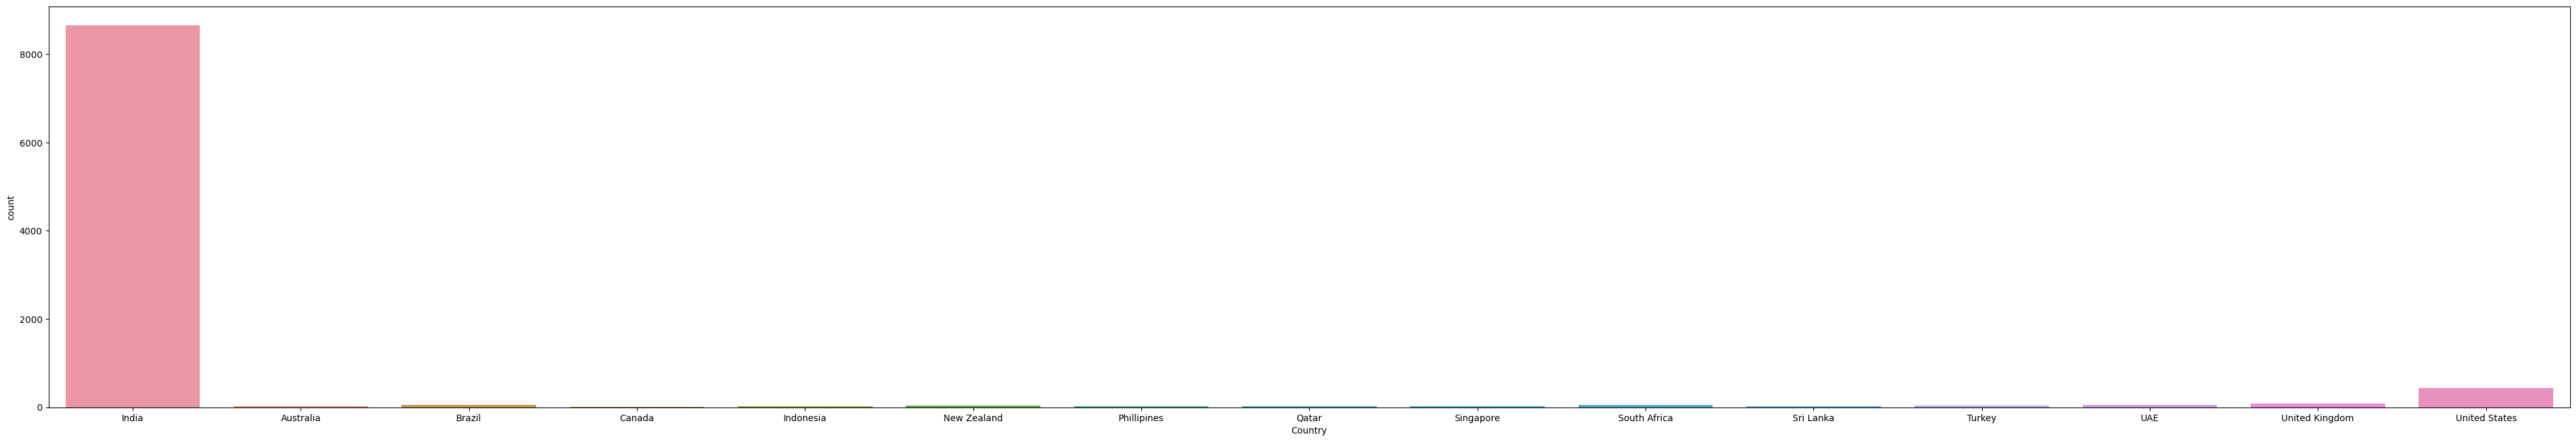

In [38]:
#country
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Country',data=df)
print(df['Country'].value_counts())

# India has the largest number of restaurant locations,followed by the united states with canada having the lowest number as we can see from the visualisation below.

Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64


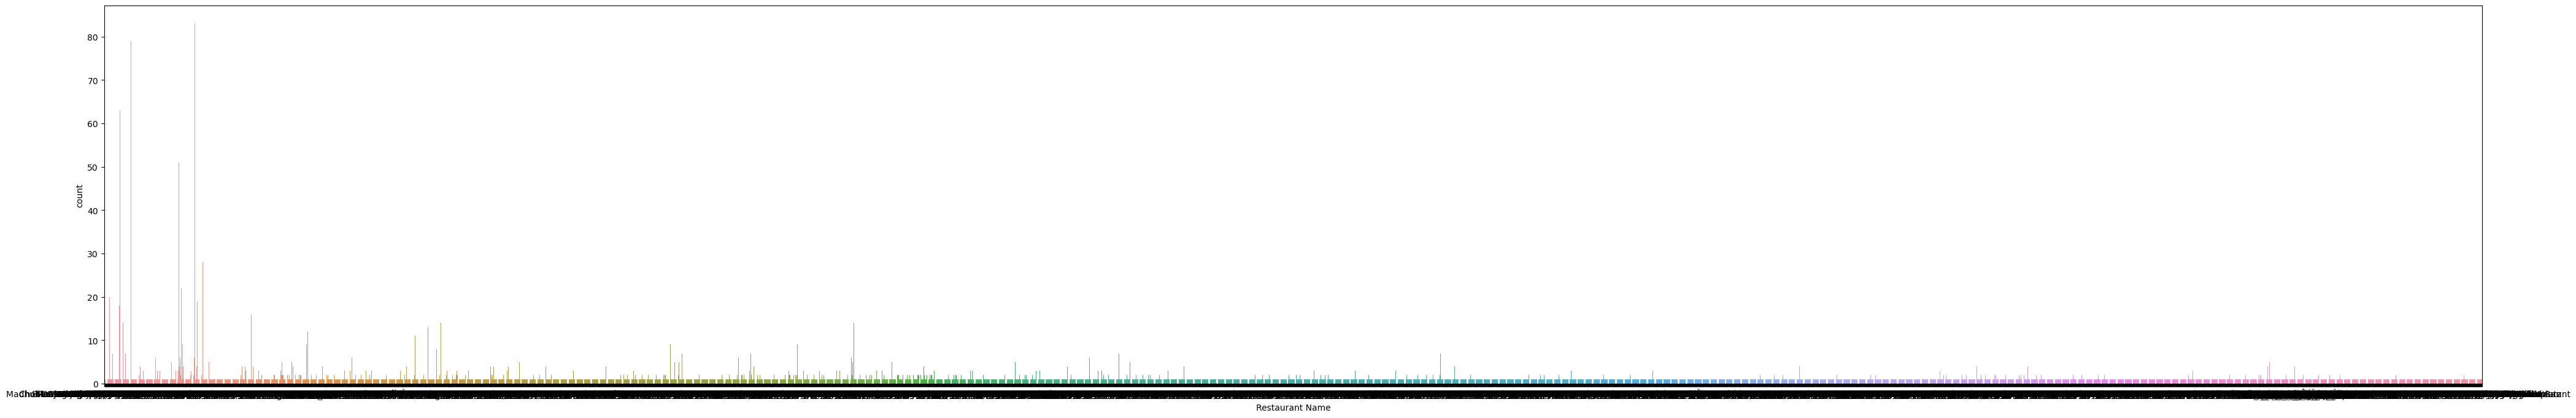

In [39]:
#Restaurant Name
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Restaurant Name',data=df)
print(df['Restaurant Name'].value_counts())

# cafe coffee day has the largest number of restaurants and there are other restaurants that have the lowest number which is one.

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64


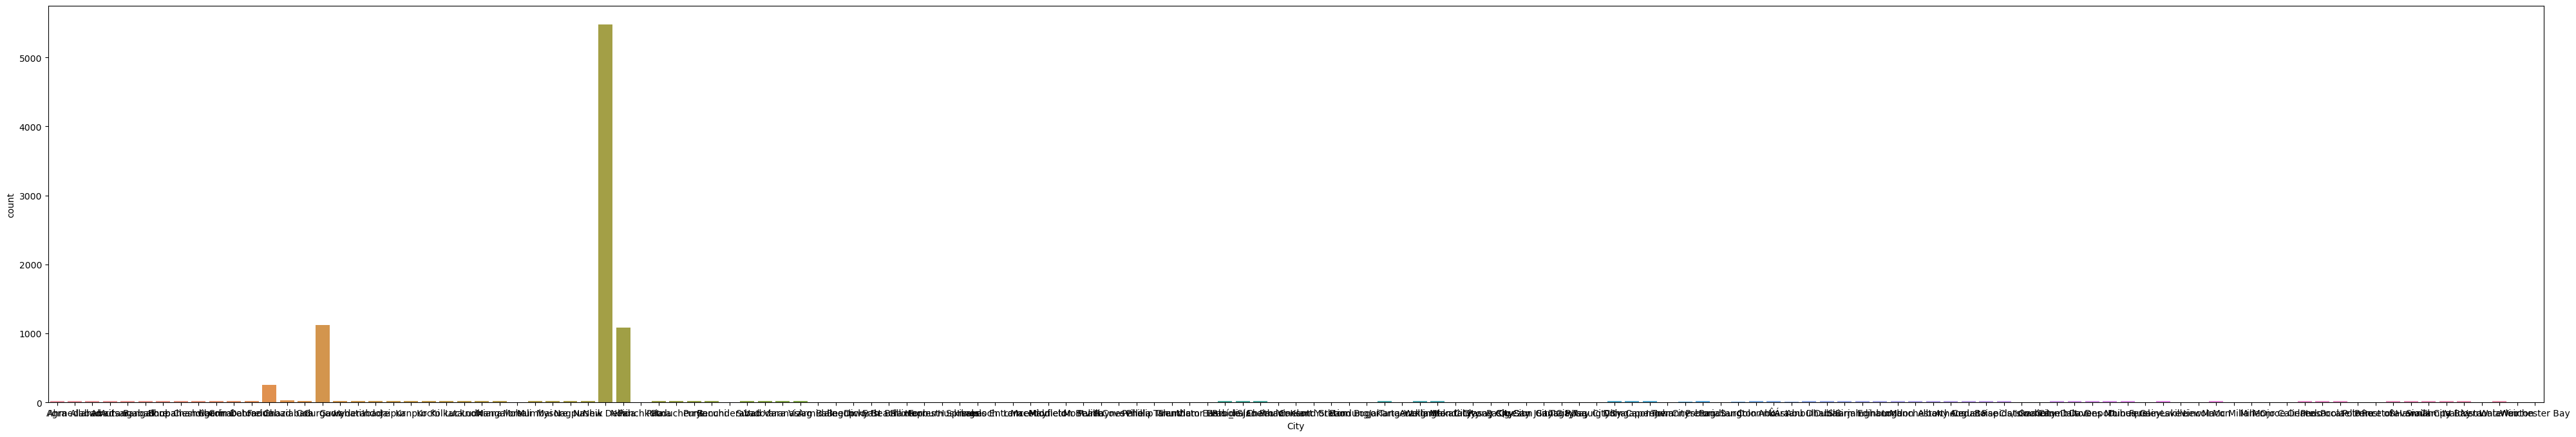

In [40]:
#City
plt.figure(figsize=(50,8))
ax=sns.countplot(x='City',data=df)
print(df['City'].value_counts())



Sector 41, Noida                                                                      11
Dilli Haat, INA, New Delhi                                                            11
Greater Kailash (GK) 1, New Delhi                                                     10
The Imperial, Janpath, New Delhi                                                       9
The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi                               8
                                                                                      ..
G-4, Local Shopping Complex, Gujranwala Town, New Delhi                                1
State Bank Colony, Near Nanak Piau Gurudwara, GTK Road, Gujranwala Town, New Delhi     1
Shop 6 & 7, DDA Market, Near Pentamed Hospital, Gujranwala Town, New Delhi             1
A-199, Gujranwala Town, New Delhi                                                      1
196 Bayfront Loop, Winchester Bay, OR 97467                                            1
Name: Address, Length

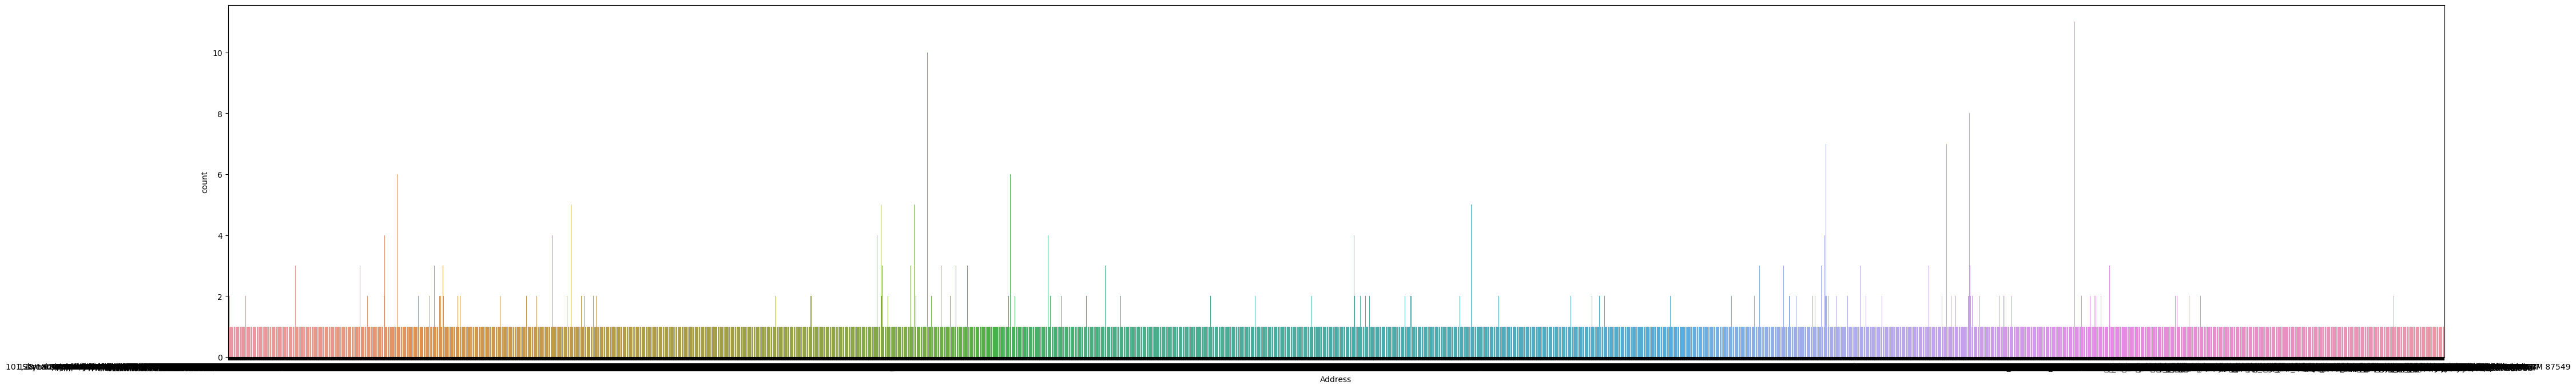

In [41]:
#Address
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Address',data=df)
print(df['Address'].value_counts())



Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
                  ... 
Waltair Uplands      1
Armidale             1
Balingup             1
Beechworth           1
Winchester Bay       1
Name: Locality, Length: 1208, dtype: int64


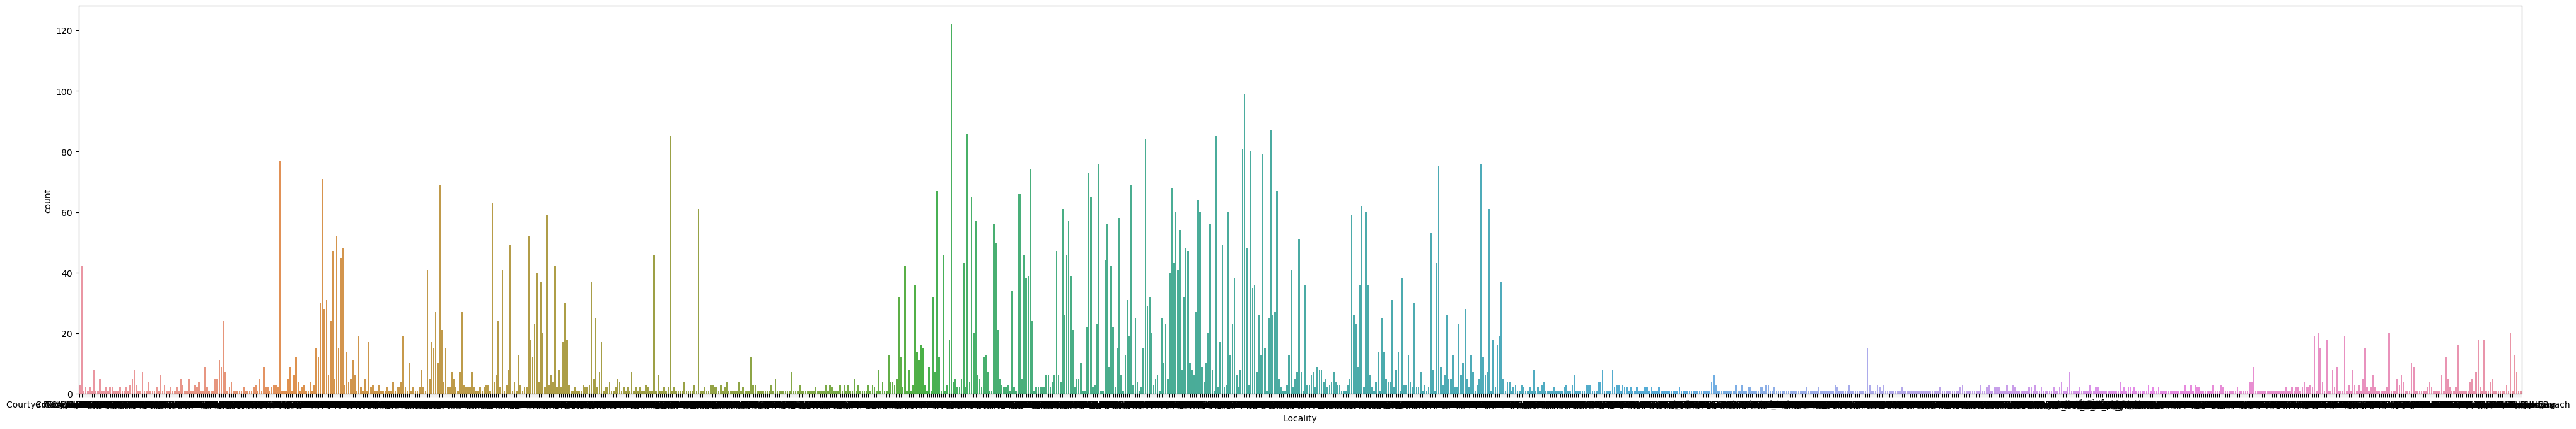

In [42]:
#Locality
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Locality',data=df)
print(df['Locality'].value_counts())



Connaught Place, New Delhi             122
Rajouri Garden, New Delhi               99
Shahdara, New Delhi                     87
Defence Colony, New Delhi               86
Pitampura, New Delhi                    85
                                      ... 
Hotel Maurya, Lodipur, Patna             1
Maurya Lok, Fraser Road Area, Patna      1
Patliputra Colony, Patna                 1
Heritage Town, Puducherry                1
Winchester Bay, Winchester Bay           1
Name: Locality Verbose, Length: 1265, dtype: int64


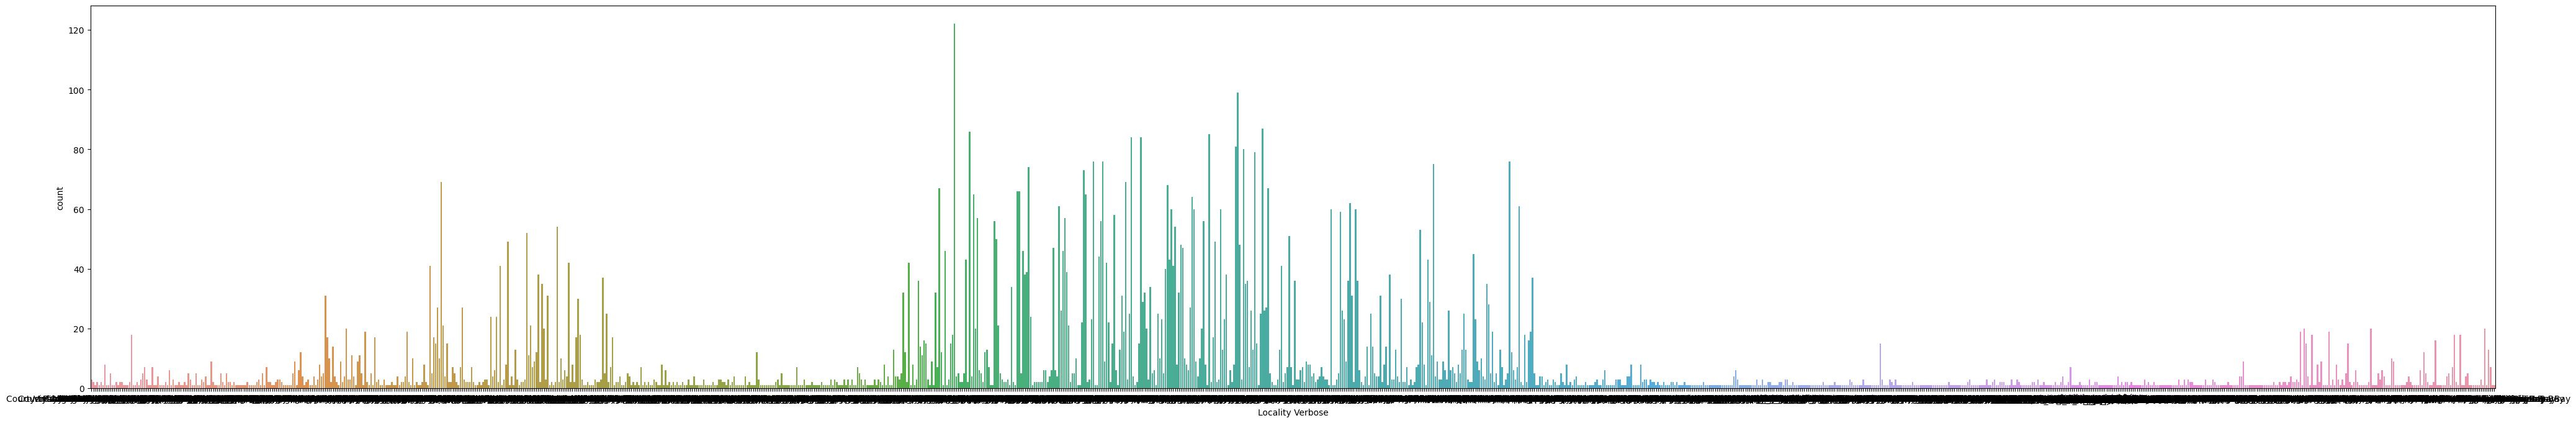

In [43]:
#Locality Verbose
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Locality Verbose',data=df)
print(df['Locality Verbose'].value_counts())




North Indian                                 936
North Indian, Chinese                        511
Fast Food                                    354
Chinese                                      354
North Indian, Mughlai                        334
                                            ... 
Cafe, Mexican, Continental                     1
North Indian, Continental, Asian, Italian      1
Continental, Cafe                              1
North Indian, Biryani, Mughlai                 1
Burger, Greek, Sandwich                        1
Name: Cuisines, Length: 1825, dtype: int64


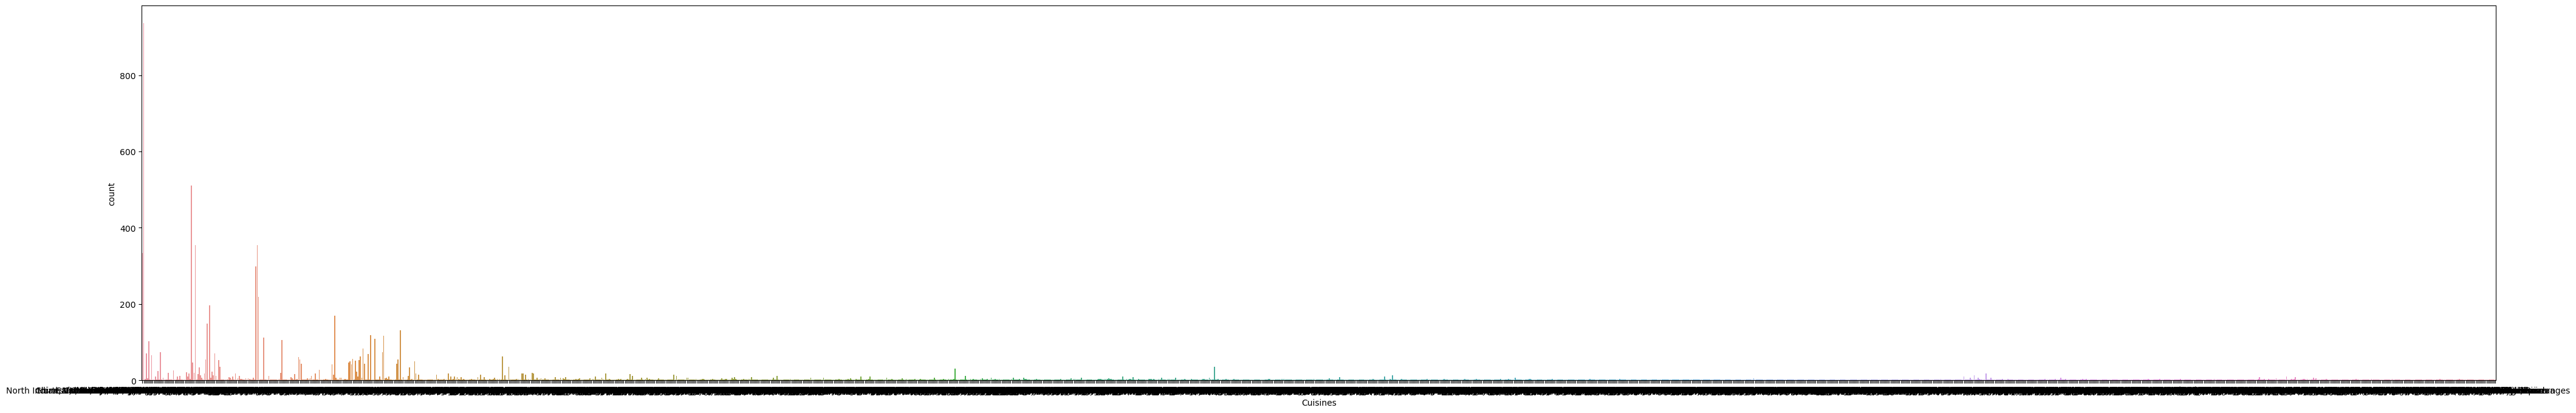

In [44]:
#Cuisines
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Cuisines',data=df)
print(df['Cuisines'].value_counts())

# India has the most cuisines


Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


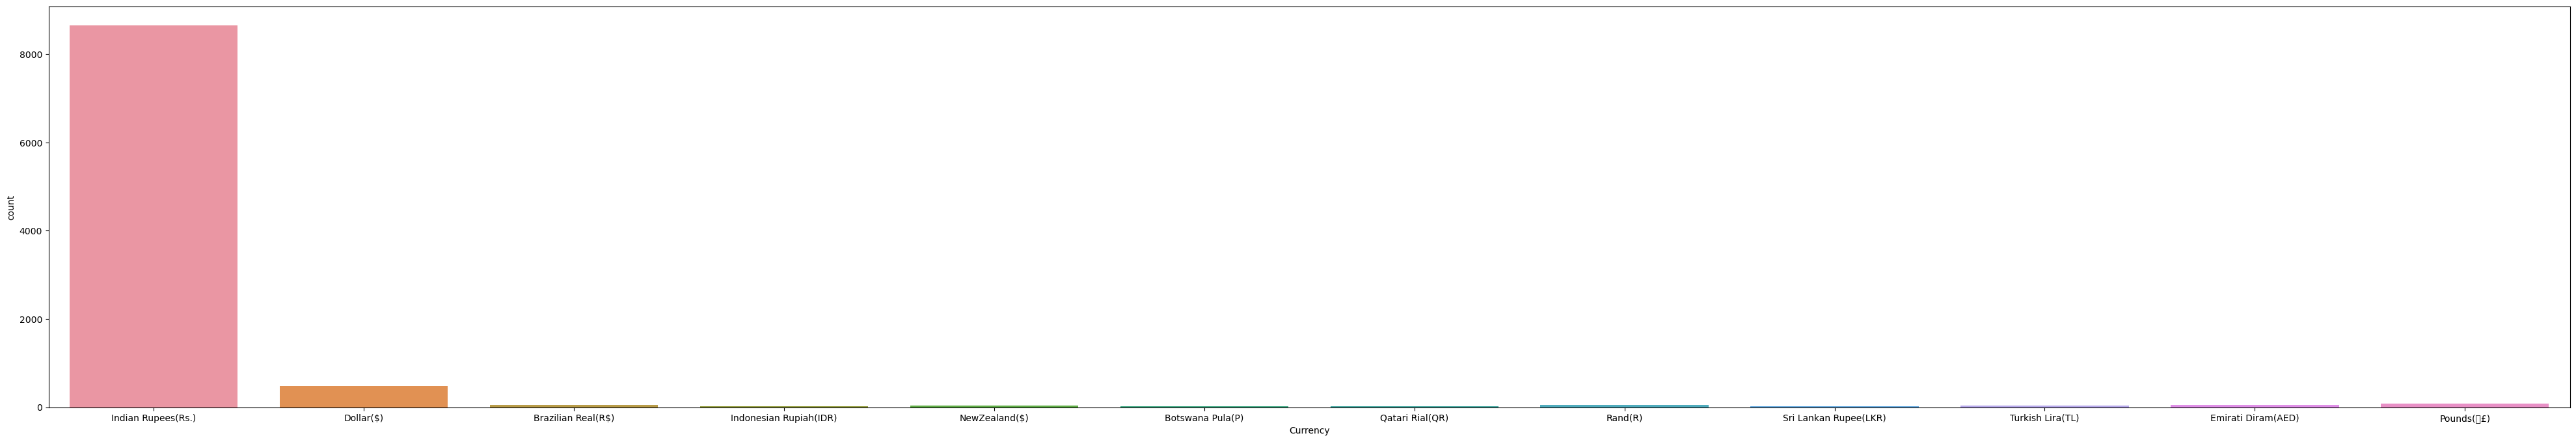

In [45]:
#Currency
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Currency',data=df)
print(df['Currency'].value_counts())



No     8393
Yes    1158
Name: Has Table booking, dtype: int64


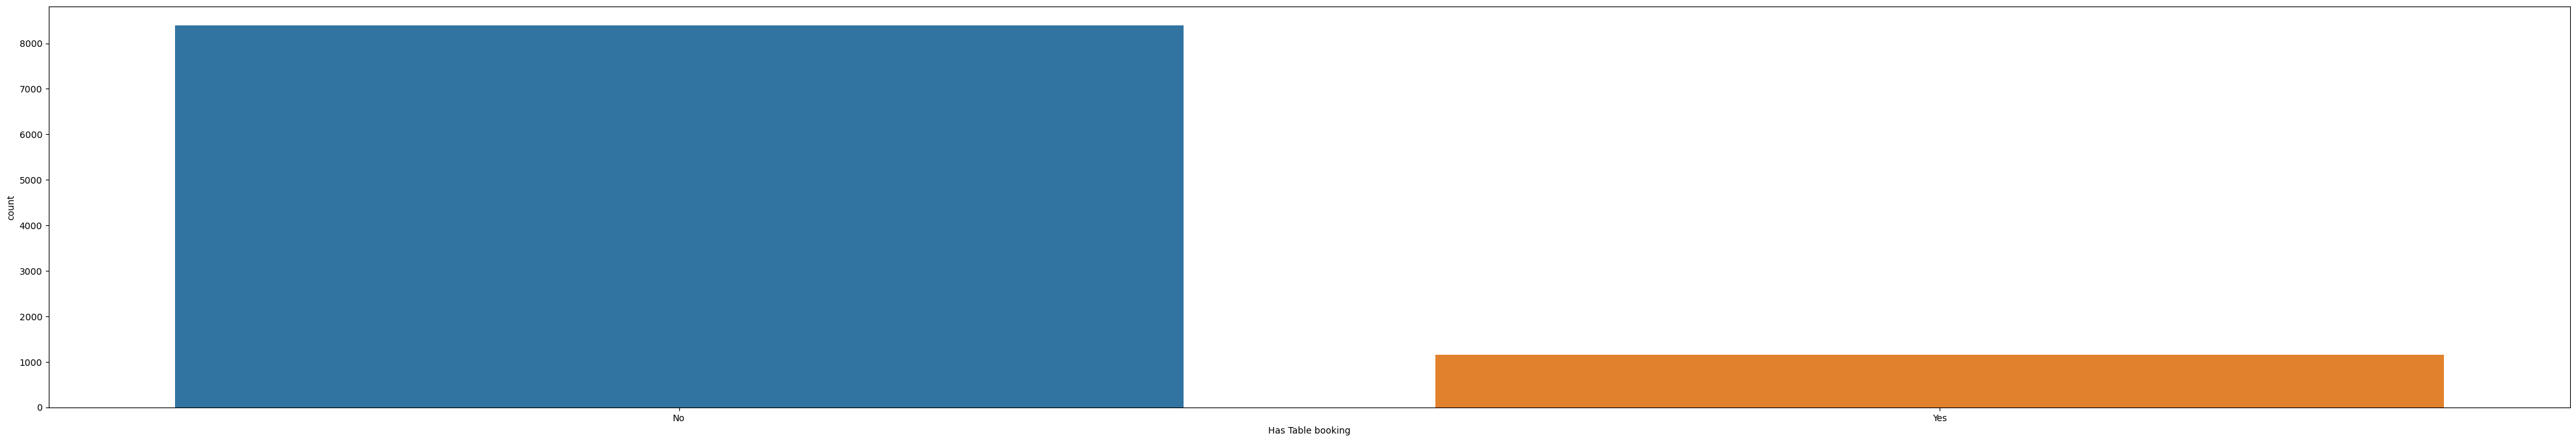

In [46]:
#Has Table booking
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Has Table booking',data=df)
print(df['Has Table booking'].value_counts())


No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


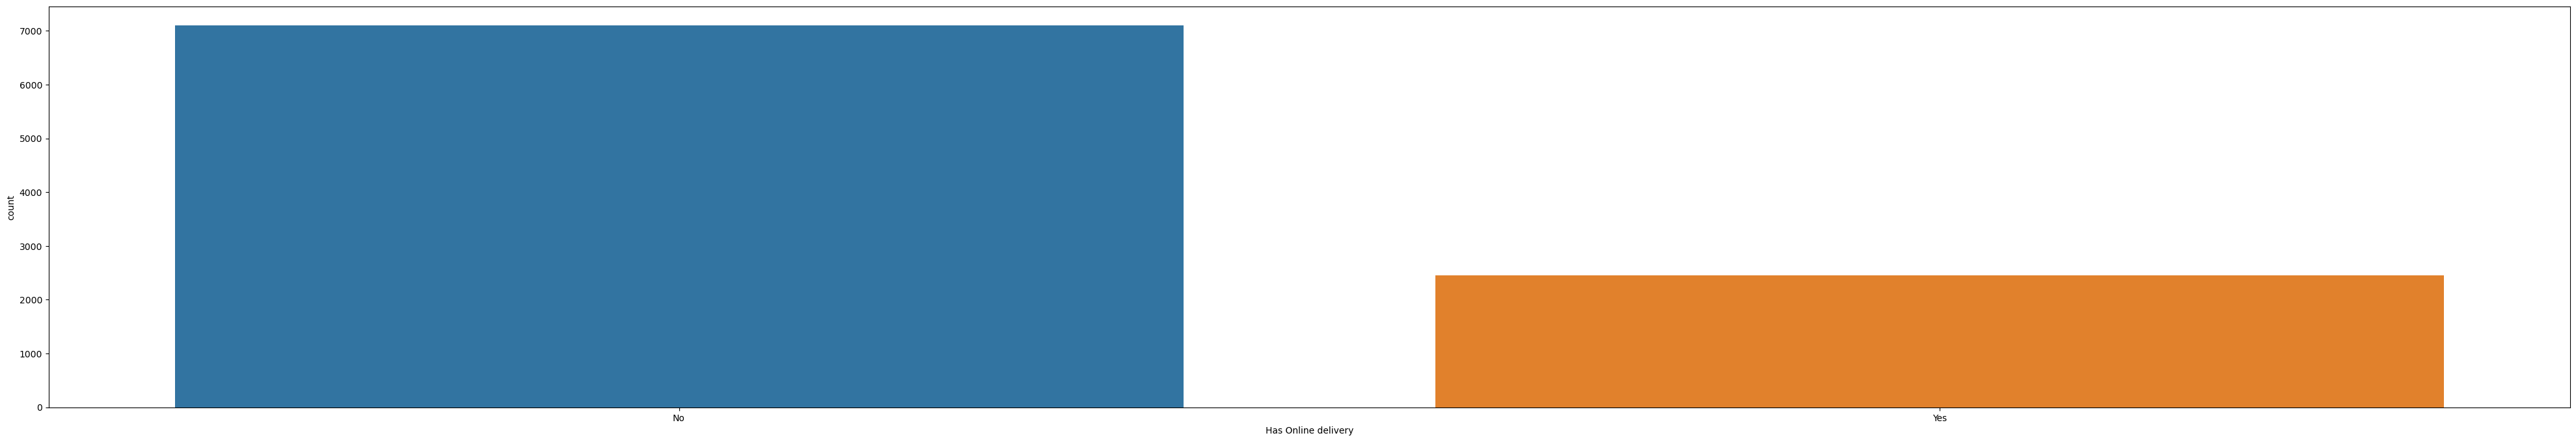

In [47]:
#Has Online delivery
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Has Online delivery',data=df)
print(df['Has Online delivery'].value_counts())


No     9517
Yes      34
Name: Is delivering now, dtype: int64


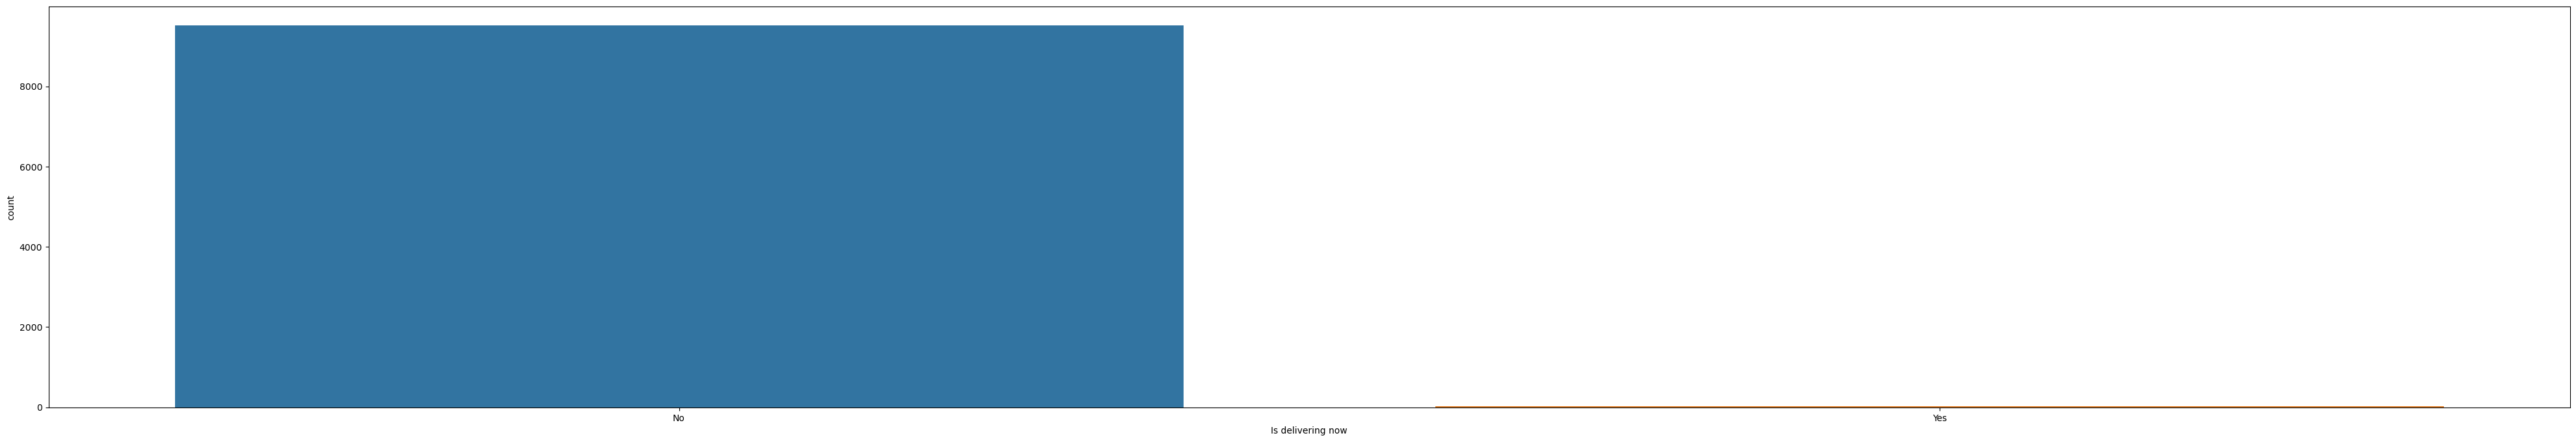

In [48]:
#Is delivering now
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Is delivering now',data=df)
print(df['Is delivering now'].value_counts())


No    9551
Name: Switch to order menu, dtype: int64


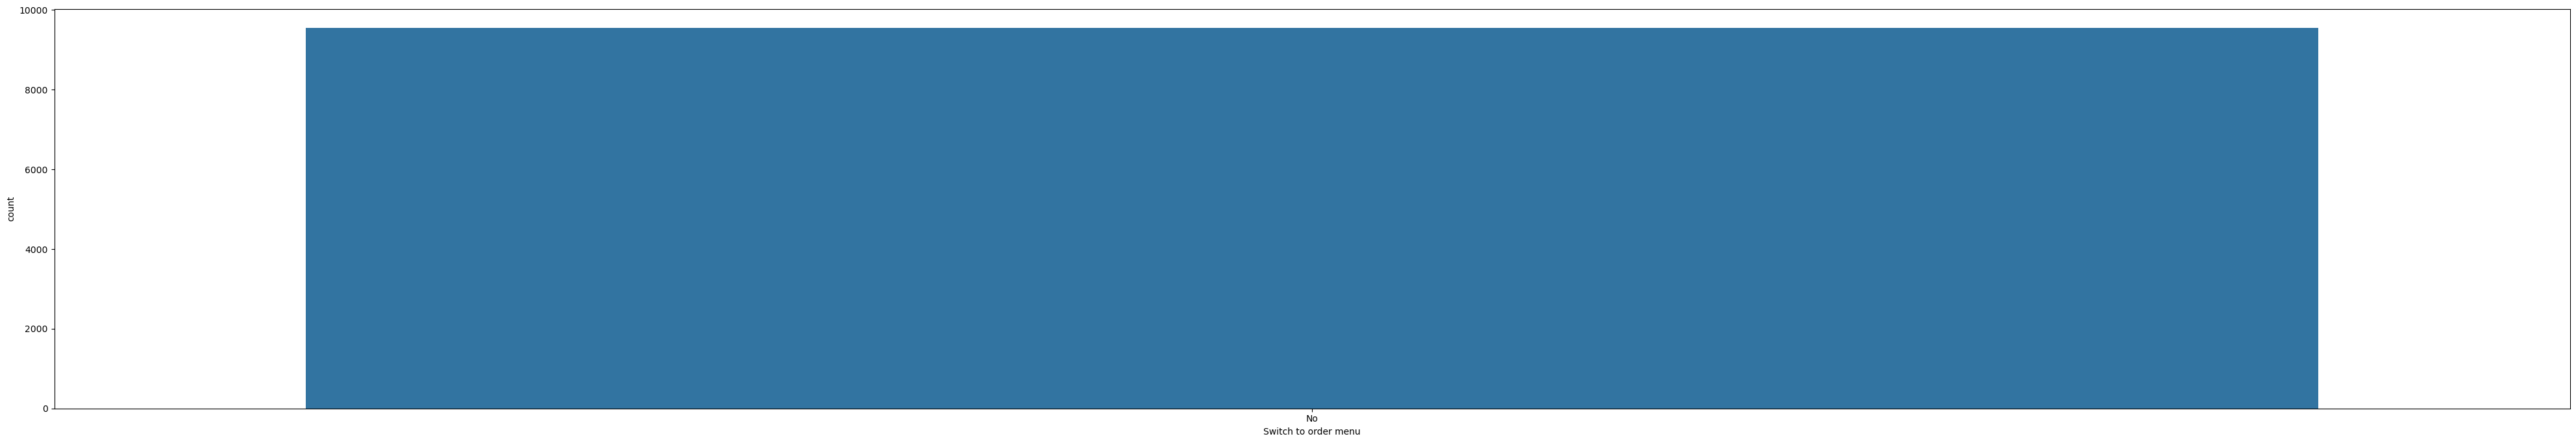

In [49]:
#Switch to order menu
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Switch to order menu',data=df)
print(df['Switch to order menu'].value_counts())



Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


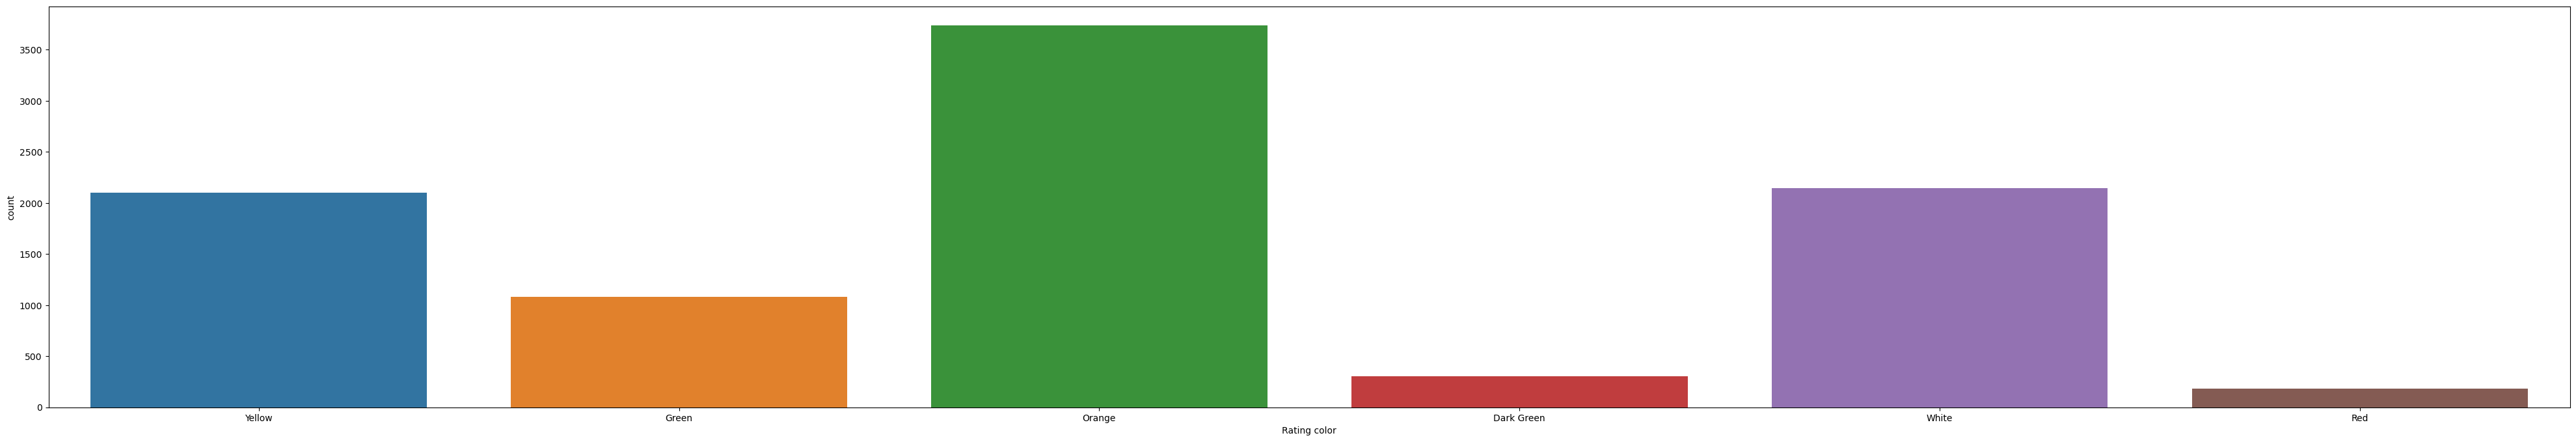

In [50]:
#Rating color
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Rating color',data=df)
print(df['Rating color'].value_counts())



Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


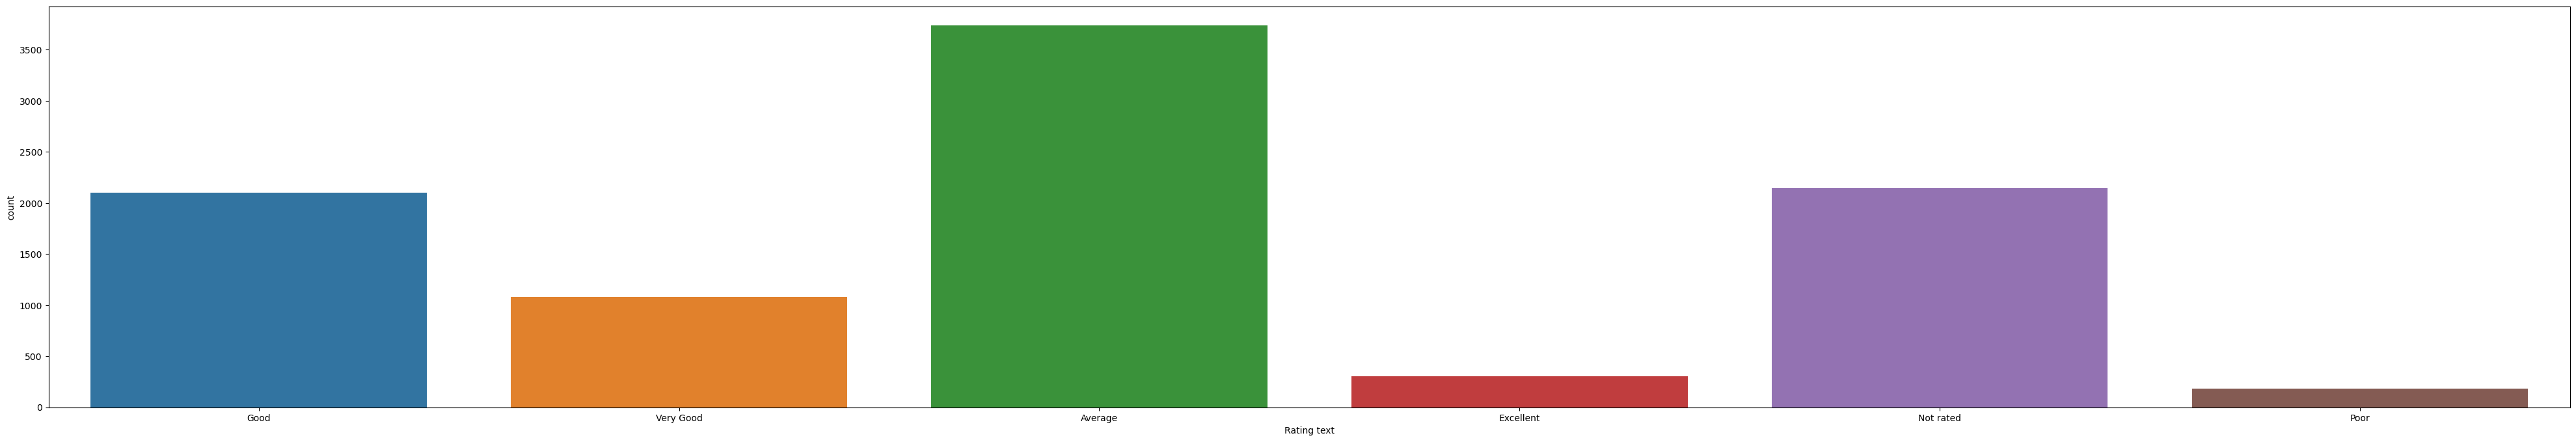

In [51]:
#Rating text
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Rating text',data=df)
print(df['Rating text'].value_counts())




# observation from univariate analysis


Country
Restaurant Name
City
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Rating color
Rating text

# Step 3.2 Updating Null values

In [52]:
# checking for null values
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

 # Observations on Null Update 
From the above we can see that all null values have been updated! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [53]:
#initializing....
enc=OrdinalEncoder()

In [54]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [55]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [56]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [57]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3.0,3400025,3201.0,1.0,4553.0,17.0,17.0,78.011544,27.161661,...,4.0,0.0,0.0,0.0,0.0,3,3.9,5.0,2.0,140
1,1,3.0,3400341,5261.0,1.0,4605.0,17.0,17.0,0.000000,0.000000,...,4.0,0.0,0.0,0.0,0.0,2,3.5,5.0,2.0,71
2,1,3.0,3400005,6919.0,1.0,6234.0,17.0,17.0,78.011608,27.160832,...,4.0,0.0,0.0,0.0,0.0,2,3.6,5.0,2.0,94
3,1,3.0,3400021,1637.0,1.0,100.0,204.0,205.0,77.998092,27.195928,...,4.0,0.0,0.0,0.0,0.0,2,4.0,1.0,5.0,87
4,1,3.0,3400017,4922.0,1.0,1316.0,204.0,205.0,78.007553,27.201725,...,4.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14.0,17697389,6794.0,135.0,1279.0,1174.0,1231.0,-92.335523,42.498400,...,2.0,0.0,0.0,0.0,0.0,1,3.7,5.0,2.0,101
9547,216,14.0,17697424,6839.0,135.0,2667.0,1174.0,1231.0,-92.335769,42.497919,...,2.0,0.0,0.0,0.0,0.0,1,3.5,5.0,2.0,58
9548,216,14.0,17697332,6945.0,135.0,957.0,1174.0,1231.0,-92.323400,42.465580,...,2.0,0.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156
9549,216,14.0,17694056,6883.0,136.0,1910.0,1176.0,1233.0,-80.529488,40.396043,...,2.0,0.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156


In [58]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3.0,3400025,3201.0,1.0,4553.0,17.0,17.0,78.011544,27.161661,...,4.0,0.0,0.0,0.0,0.0,3,3.9,5.0,2.0,140
1,1,3.0,3400341,5261.0,1.0,4605.0,17.0,17.0,0.000000,0.000000,...,4.0,0.0,0.0,0.0,0.0,2,3.5,5.0,2.0,71
2,1,3.0,3400005,6919.0,1.0,6234.0,17.0,17.0,78.011608,27.160832,...,4.0,0.0,0.0,0.0,0.0,2,3.6,5.0,2.0,94
3,1,3.0,3400021,1637.0,1.0,100.0,204.0,205.0,77.998092,27.195928,...,4.0,0.0,0.0,0.0,0.0,2,4.0,1.0,5.0,87
4,1,3.0,3400017,4922.0,1.0,1316.0,204.0,205.0,78.007553,27.201725,...,4.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,177


In [59]:
df.tail()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,216,14.0,17697389,6794.0,135.0,1279.0,1174.0,1231.0,-92.335523,42.498400,...,2.0,0.0,0.0,0.0,0.0,1,3.7,5.0,2.0,101
9547,216,14.0,17697424,6839.0,135.0,2667.0,1174.0,1231.0,-92.335769,42.497919,...,2.0,0.0,0.0,0.0,0.0,1,3.5,5.0,2.0,58
9548,216,14.0,17697332,6945.0,135.0,957.0,1174.0,1231.0,-92.323400,42.465580,...,2.0,0.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156
9549,216,14.0,17694056,6883.0,136.0,1910.0,1176.0,1233.0,-80.529488,40.396043,...,2.0,0.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156
9550,216,14.0,17559793,2342.0,138.0,962.0,1186.0,1243.0,-124.175346,43.678998,...,2.0,0.0,0.0,0.0,0.0,2,3.2,2.0,0.0,16


In [60]:
df.sample(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8067,1,3.0,18387305,7393.0,89.0,5265.0,933.0,973.0,0.000000,0.000000,...,4.0,0.0,0.0,0.0,0.0,1,0.0,4.0,3.0,1
5250,1,3.0,2965,829.0,88.0,5043.0,710.0,721.0,77.149640,28.693601,...,4.0,0.0,0.0,0.0,0.0,1,3.9,5.0,2.0,813
7898,1,3.0,18336506,4663.0,89.0,7985.0,916.0,942.0,77.328317,28.574537,...,4.0,0.0,0.0,0.0,0.0,1,3.5,5.0,2.0,23
5495,1,3.0,18489651,6733.0,88.0,6932.0,748.0,760.0,77.083207,28.604448,...,4.0,0.0,0.0,0.0,0.0,2,0.0,4.0,3.0,1
6122,1,3.0,9253,526.0,88.0,37.0,854.0,867.0,77.114153,28.734508,...,4.0,0.0,0.0,0.0,0.0,1,3.5,5.0,2.0,75
8542,1,3.0,11371,1511.0,106.0,8745.0,789.0,800.0,73.916619,18.562450,...,4.0,1.0,1.0,0.0,0.0,3,4.5,0.0,1.0,1439
64,1,3.0,2200030,1803.0,5.0,4330.0,452.0,457.0,74.875878,31.635658,...,4.0,0.0,0.0,0.0,0.0,3,3.4,2.0,0.0,122
4876,1,3.0,18241509,1325.0,88.0,5410.0,676.0,687.0,77.146758,28.656981,...,4.0,0.0,0.0,0.0,0.0,1,4.1,1.0,5.0,60
8882,189,9.0,6400217,7282.0,22.0,5475.0,1146.0,1201.0,18.421000,-33.904167,...,9.0,0.0,0.0,0.0,0.0,4,4.4,1.0,5.0,466
7199,1,3.0,18375387,5641.0,88.0,3772.0,1138.0,1193.0,77.305843,28.592302,...,4.0,0.0,0.0,0.0,0.0,1,0.0,4.0,3.0,0


In [61]:
df.describe()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.000000,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,3.736781,9.051128e+06,3653.204586,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,...,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748
std,56.750546,2.651963,8.791521e+06,2142.917876,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,...,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145
min,1.000000,0.000000,5.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.019625e+05,1777.500000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,...,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,1.000000,3.000000,6.004089e+06,3595.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,...,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.000000,3.000000,1.835229e+07,5485.500000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,...,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000
max,216.000000,14.000000,1.850065e+07,7445.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,...,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


In [62]:
df.dtypes

Country Code              int64
Country                 float64
Restaurant ID             int64
Restaurant Name         float64
City                    float64
Address                 float64
Locality                float64
Locality Verbose        float64
Longitude               float64
Latitude                float64
Cuisines                float64
Average Cost for two      int64
Currency                float64
Has Table booking       float64
Has Online delivery     float64
Is delivering now       float64
Switch to order menu    float64
Price range               int64
Aggregate rating        float64
Rating color            float64
Rating text             float64
Votes                     int64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

# Step 3.1 - Normal Distribution Check

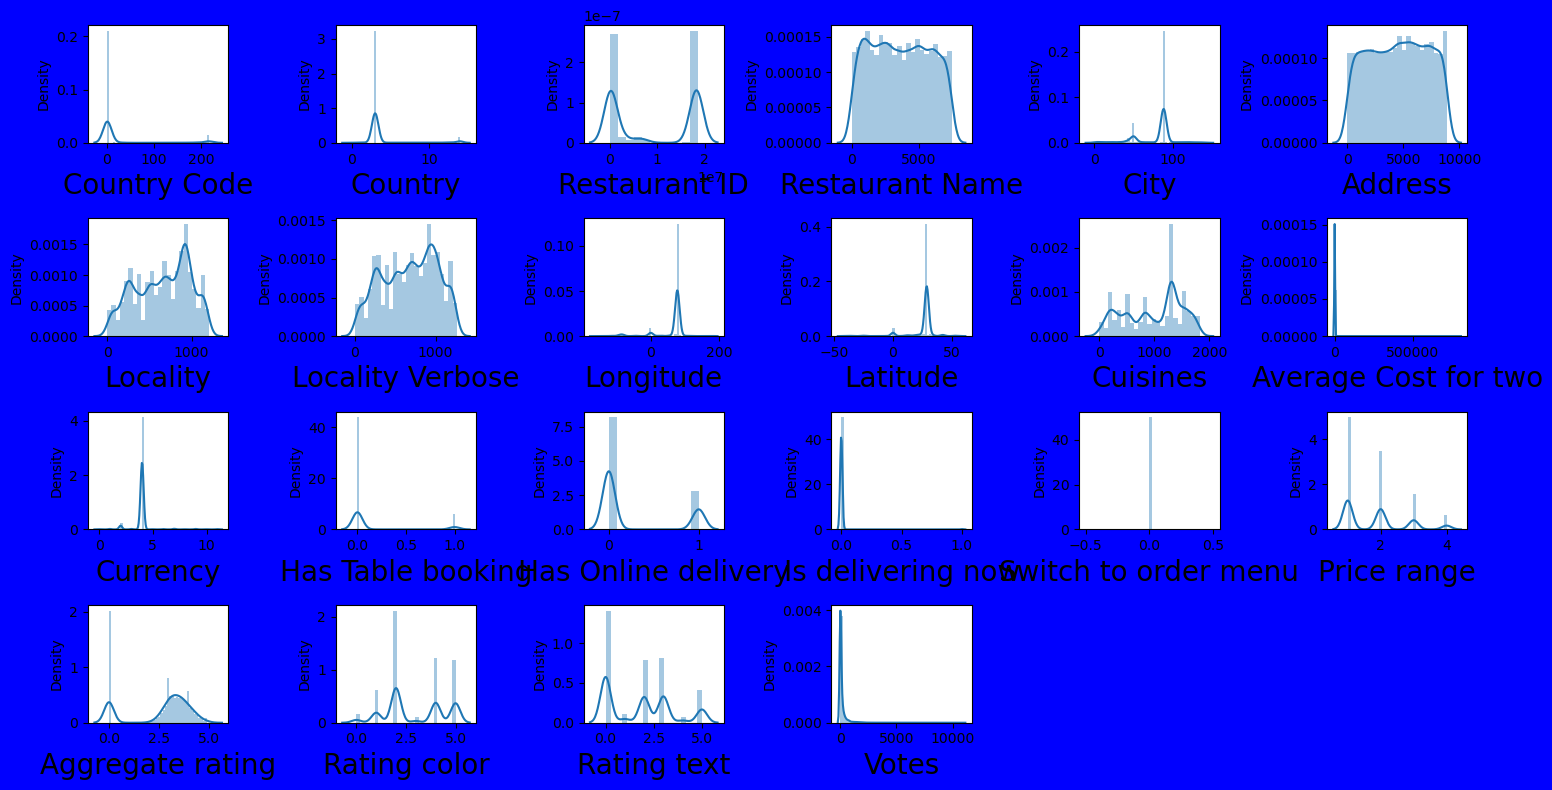

In [63]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=23:#since there are 6 features
        ax = plt.subplot(4,6,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot we can see that multiple features does not obey a normal distribution, the building blocks is not in tandem with a normalized curve:

- longtitude
- latitude
- locality verbose
- locality
- average cost for two

***The normal distribution of the quality has no contribution to our Model Building

# Step 3.2 - Scatter Plot Check
- Lets visualize the relationship between the features and the Label

In [64]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop('Price range',axis=1)
features

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,1,3.0,3400025,3201.0,1.0,4553.0,17.0,17.0,78.011544,27.161661,...,850,4.0,0.0,0.0,0.0,0.0,3.9,5.0,2.0,140
1,1,3.0,3400341,5261.0,1.0,4605.0,17.0,17.0,0.000000,0.000000,...,700,4.0,0.0,0.0,0.0,0.0,3.5,5.0,2.0,71
2,1,3.0,3400005,6919.0,1.0,6234.0,17.0,17.0,78.011608,27.160832,...,500,4.0,0.0,0.0,0.0,0.0,3.6,5.0,2.0,94
3,1,3.0,3400021,1637.0,1.0,100.0,204.0,205.0,77.998092,27.195928,...,400,4.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,87
4,1,3.0,3400017,4922.0,1.0,1316.0,204.0,205.0,78.007553,27.201725,...,1000,4.0,0.0,0.0,0.0,0.0,4.2,1.0,5.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14.0,17697389,6794.0,135.0,1279.0,1174.0,1231.0,-92.335523,42.498400,...,10,2.0,0.0,0.0,0.0,0.0,3.7,5.0,2.0,101
9547,216,14.0,17697424,6839.0,135.0,2667.0,1174.0,1231.0,-92.335769,42.497919,...,10,2.0,0.0,0.0,0.0,0.0,3.5,5.0,2.0,58
9548,216,14.0,17697332,6945.0,135.0,957.0,1174.0,1231.0,-92.323400,42.465580,...,25,2.0,0.0,0.0,0.0,0.0,3.9,5.0,2.0,156
9549,216,14.0,17694056,6883.0,136.0,1910.0,1176.0,1233.0,-80.529488,40.396043,...,25,2.0,0.0,0.0,0.0,0.0,3.9,5.0,2.0,156


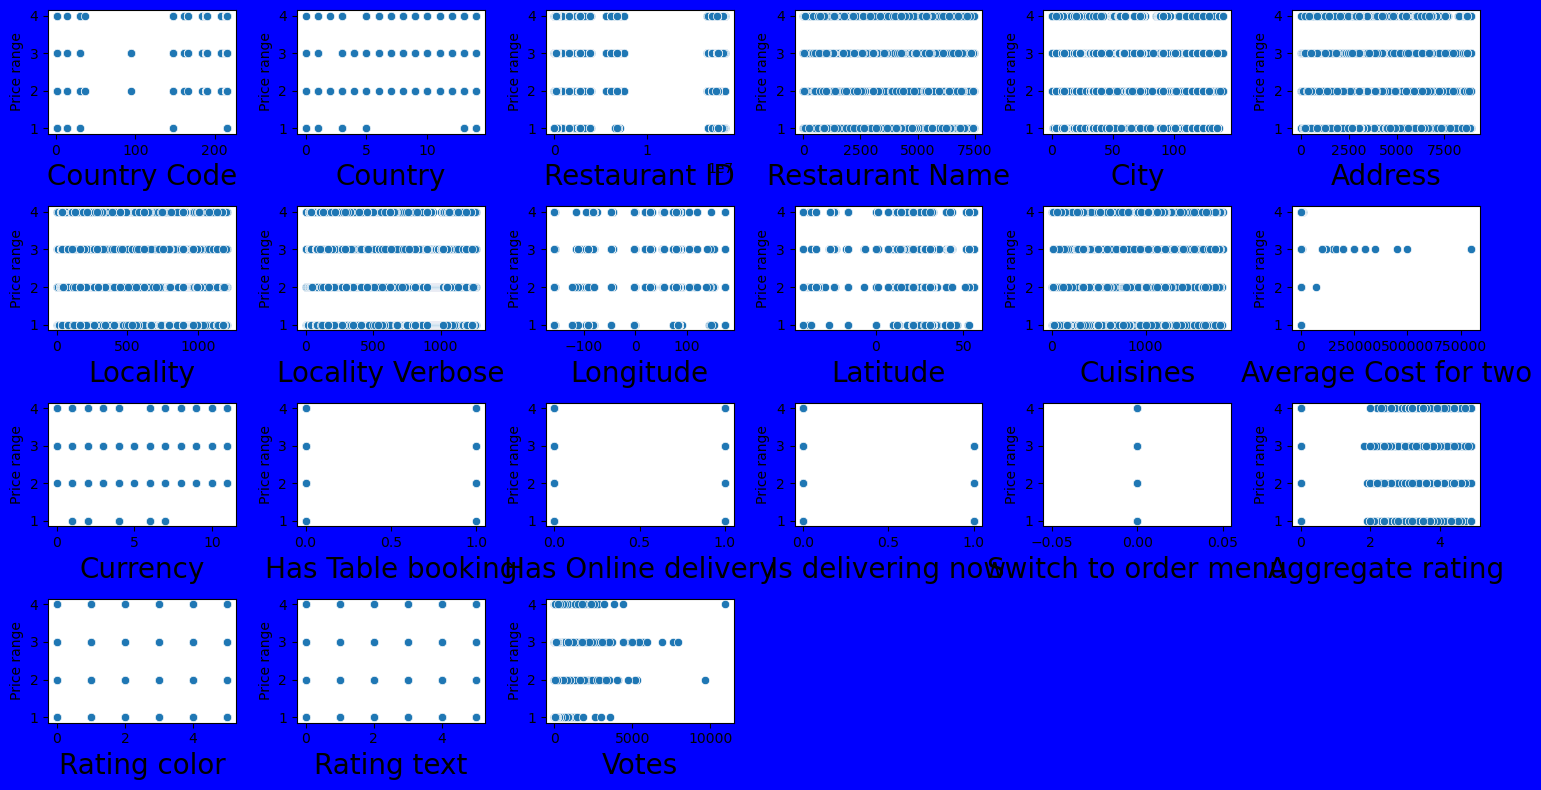

In [65]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=23:#since there are 6 features
        ax = plt.subplot(4,6,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Price range'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the below features and the Label(price range)
As we can see the target is a categorical data

- restaurant name
- city
- address
- cuisines
- locality
- longtitude and latitude


# Step 3.3 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [66]:
#checking for general correlation
df.corr()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,0.968700,0.148471,0.020012,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,...,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530
Country,0.968700,1.000000,0.161763,0.017560,-0.180959,-0.235815,-0.118784,-0.116406,-0.766221,0.181299,...,-0.105296,-0.062076,-0.140464,-0.016607,NaN,0.178035,0.255591,-0.155486,0.203846,0.155161
Restaurant ID,0.148471,0.161763,1.000000,0.003999,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,...,-0.121472,-0.110071,-0.085089,0.012548,NaN,-0.134540,-0.326212,0.130540,0.251114,-0.147023
Restaurant Name,0.020012,0.017560,0.003999,1.000000,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,...,0.009669,0.041173,0.028082,0.011984,NaN,0.061275,0.029367,-0.007311,0.012131,0.018512
City,-0.181728,-0.180959,-0.005844,-0.001399,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,...,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Address,-0.220342,-0.235815,0.080615,0.000763,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,...,0.069499,0.006428,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.101754
Locality,-0.120075,-0.118784,0.069511,0.004322,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,...,0.023723,-0.065594,-0.030993,-0.007299,NaN,-0.114459,-0.174336,0.036831,-0.036969,-0.123569
Locality Verbose,-0.117543,-0.116406,0.070102,0.004281,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,...,0.022966,-0.065132,-0.031766,-0.007353,NaN,-0.112313,-0.173254,0.037104,-0.035430,-0.122877
Longitude,-0.698299,-0.766221,-0.226081,-0.001920,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,...,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.019792,0.181299,-0.052081,0.009922,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,...,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962


In [67]:
#checking for correlation between each feature and Label
df.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Restaurant ID          -0.134540
Locality               -0.114459
Locality Verbose       -0.112313
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005265
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Switch to order menu         NaN
Name: Price range, dtype: float64

<AxesSubplot:>

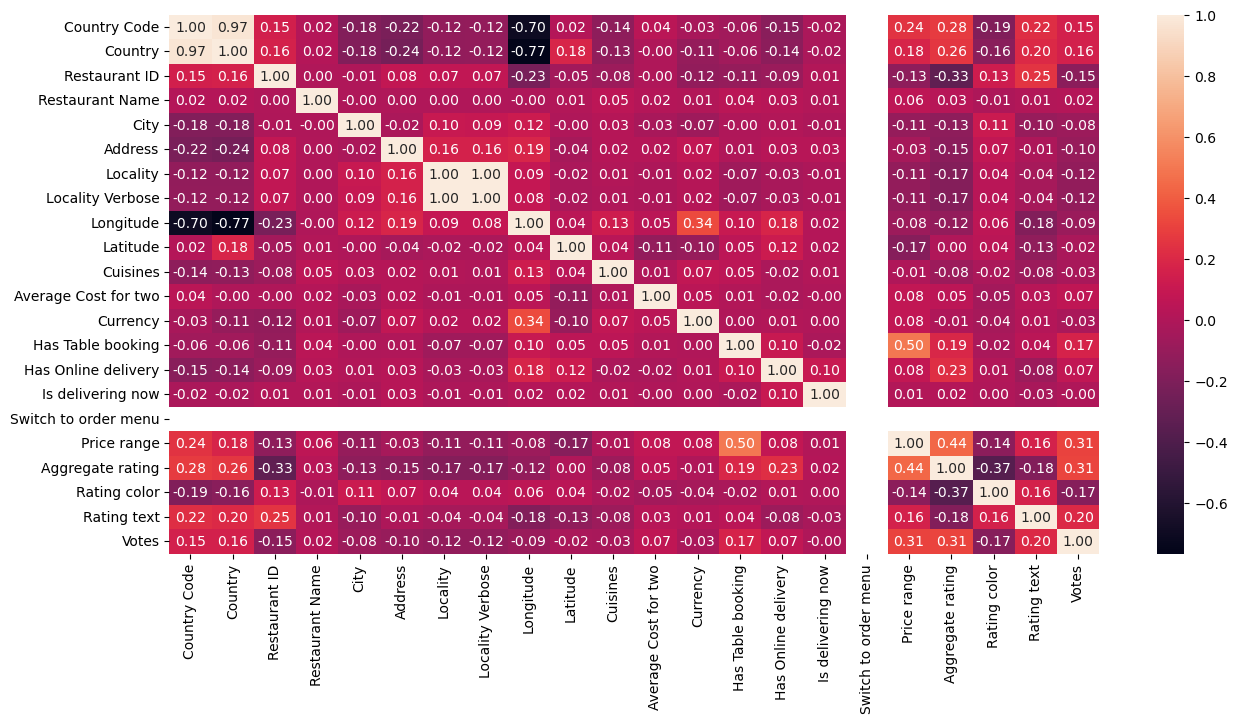

In [68]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

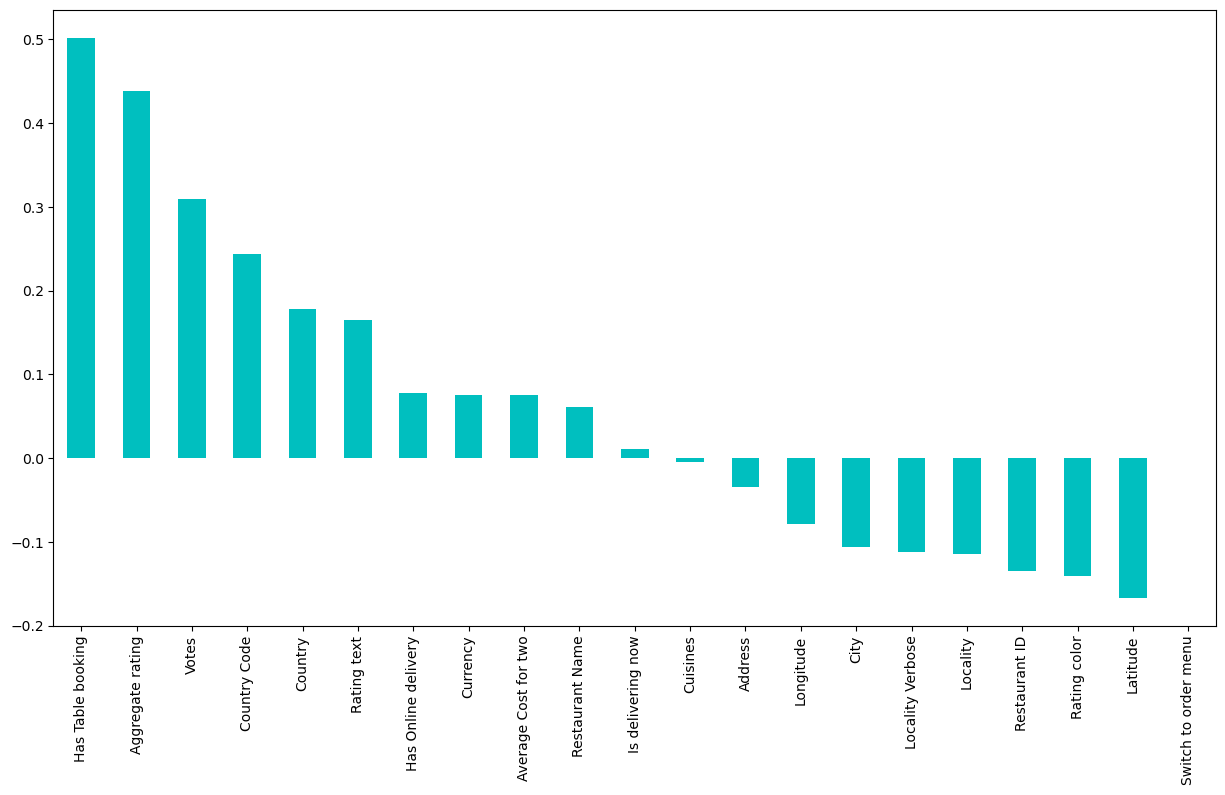

In [69]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar', color='c')
plt.show()

# Observations on Correlation
From the above correlation statistics;

Collinearity:
    Latitude               -0.166688:
        it  has a negative correlation of 16% with the target column which can be considered as fair bond
    Rating color           -0.140468:
        it has a negative correlation of 14% with the target column which can be considered as fair bond
    Restaurant ID          -0.134540:
        it has a negative correlation of 13% with the target column which can be considered as fair bond
    Locality               -0.114459:
        it has a negative correlation of 11% with the target column which can be considered as fair bond
    Locality Verbose       -0.112313:
        it has a negative correlation of 11% with the target column which can be considered as fair bond
    City                   -0.105759:
        it has a negative correlation of 10% with the target column which can be considered as fair bond
    Longitude              -0.078939:
        it has a negative correlation of 8% with the target column which can be considered as poor bond
    Address                -0.034952:
        it has a negative correlation of 3% with the target column which can be considered as poor bond
    Cuisines               -0.005265:
        it has a negative correlation of 0% with the target column which can be considered as no bond
    Is delivering now       0.010940:
        it has a positive correlation of 1% with the target column which can be considered as poor bond
    Restaurant Name         0.061275:
        it has a positive correlation of 6% with the target column which can be considered as poor bond
    Average Cost for two    0.075083:
        it has a positive correlation of 8% with the target column which can be considered as poor bond
    Currency                0.075179:
        it has a positive correlation of 8% with the target column which can be considered as poor bond
    Has Online delivery     0.077918:
        it has a positive correlation of 8% with the target column which can be considered as poor bond
    Rating text             0.164242:
        it has a positive correlation of 16% with the target column which can be considered as fairly good bond
    Country                 0.178035:
        has a positive correlation of 17% with the target column which can be considered as fairly good bond
    Country Code            0.243327:
        it has a positive correlation of 24% with the target column which can be considered as fairly good bond
    Votes                   0.309444:
        it has a positive correlation of 30% with the target column which can be considered as fairly good bond
    - Aggregate rating        0.437944:
        it has a positive correlation of 43% with the target column which can be considered as fairly good bond
    - Has Table booking       0.501925:
        it has a positive correlation of 50% with the target column which can be considered as fairly strong bond
    
    
 
 - Feature with Maximum correlation = Cuisines
 - Feature with Minimum correlation = Has Table booking
 
Multicollinearity:
 - From the heatmap we can see that the pairs of features have some noticeable correllation between very few features
 - but this will be resolved during feature selection
 
But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

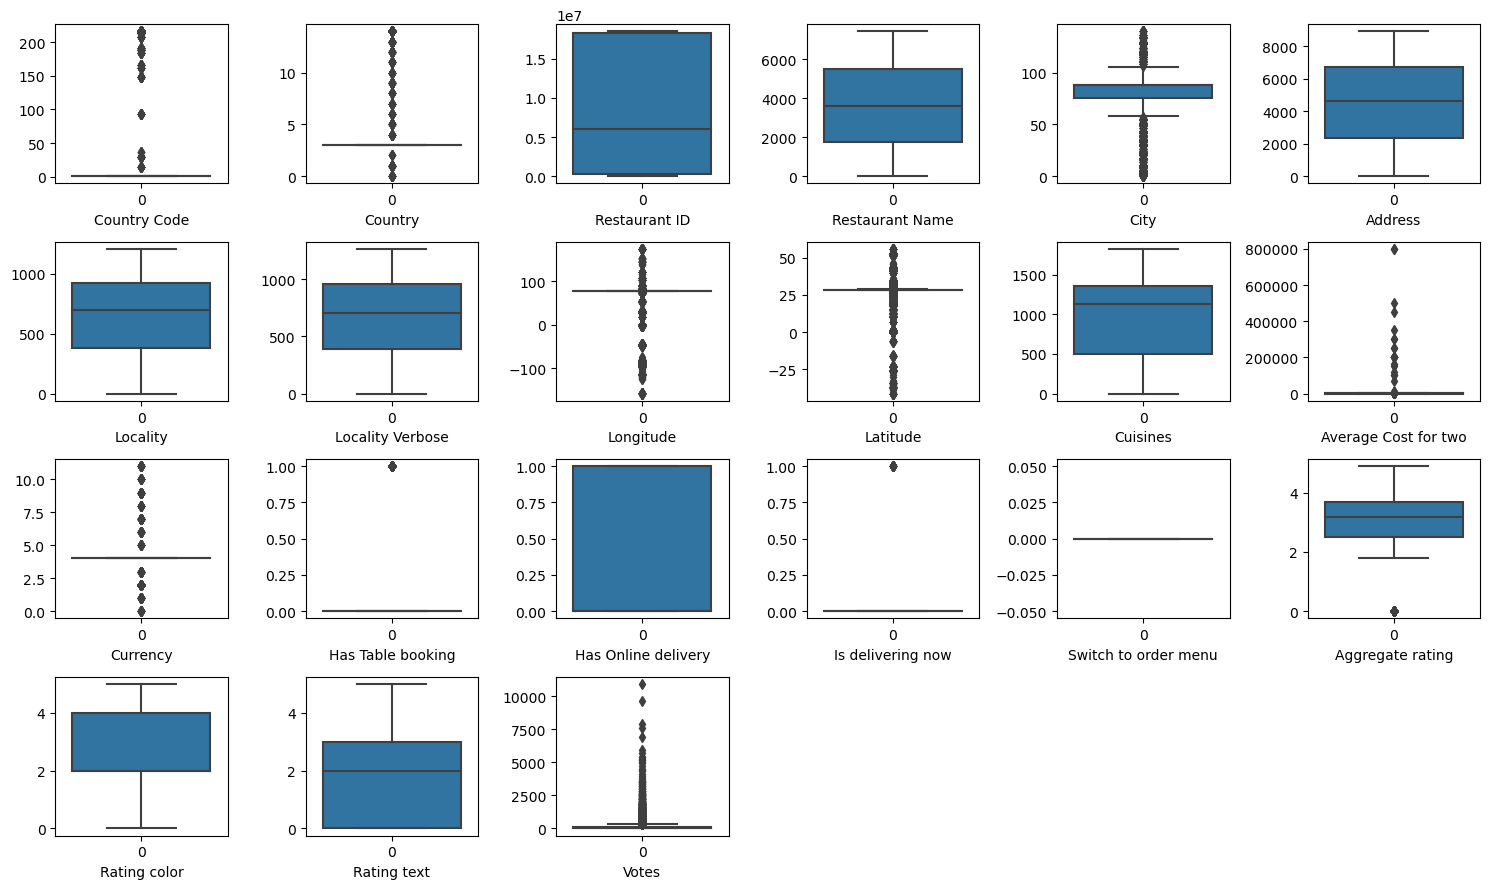

In [70]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if graph<=23:#this was made 12 just to allow for 6 spaces
        plt.subplot(4,6,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=features[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that all the features posses outliers, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.5 - Skewness Check

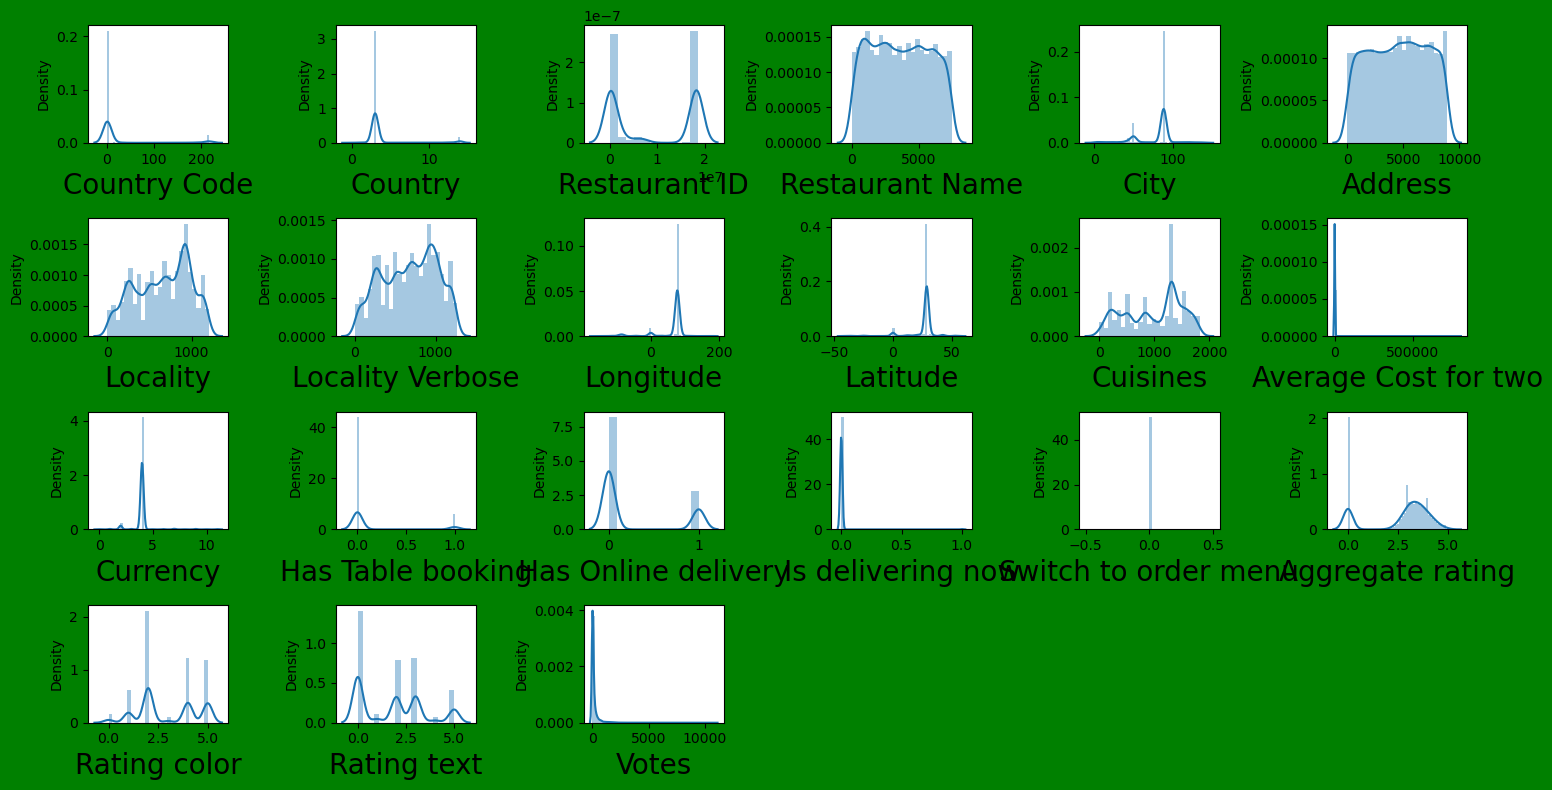

In [71]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=23:#since there are 6 features
        ax = plt.subplot(4,6,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(features[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [72]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
features.skew()

Country Code             3.043965
Country                  3.312721
Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305923
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence majority of the Columns are having skewness:

 - Country Code             3.043965
 - Country                  3.312721
 - Longitude               -2.807328
 - Latitude                -3.081635
 - Average Cost for two    35.477915
 - Currency                 2.858093
 - Has Table booking        2.321100
 - Has Online delivery      1.114620
 - Is delivering now       16.673412
 - Votes                    8.807637
 
 please note that skewness check is only on features with continous values.we will ignore skewness for categorical values

# Step 3.6  - Target Variable Check

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


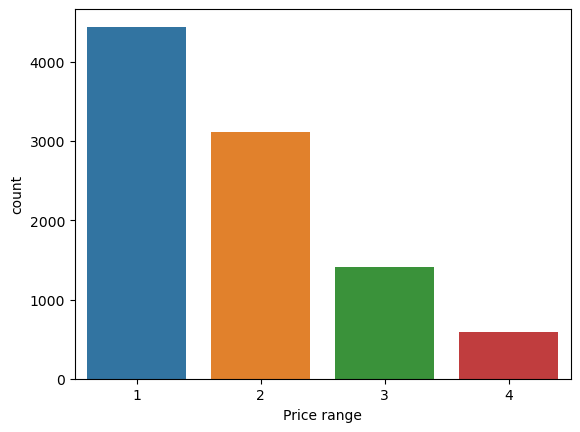

In [73]:
ax=sns.countplot(x='Price range',data=df)
print(df['Price range'].value_counts())

from the above graph the dependent variable has 4 classes of price range with the majority being Class 1 and minority Class 4

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [74]:
#Recheking shape of original data
df.shape

(9551, 22)

In [75]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(9551, 22)

# Step 4.4 - Dropping of Features and feature selection using python library

# Feature selection and engineering

# lets import a package to select the best features

# automatic feature selection by using featurewiz package

In [76]:
from featurewiz import featurewiz

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (9551, 22)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
################################################

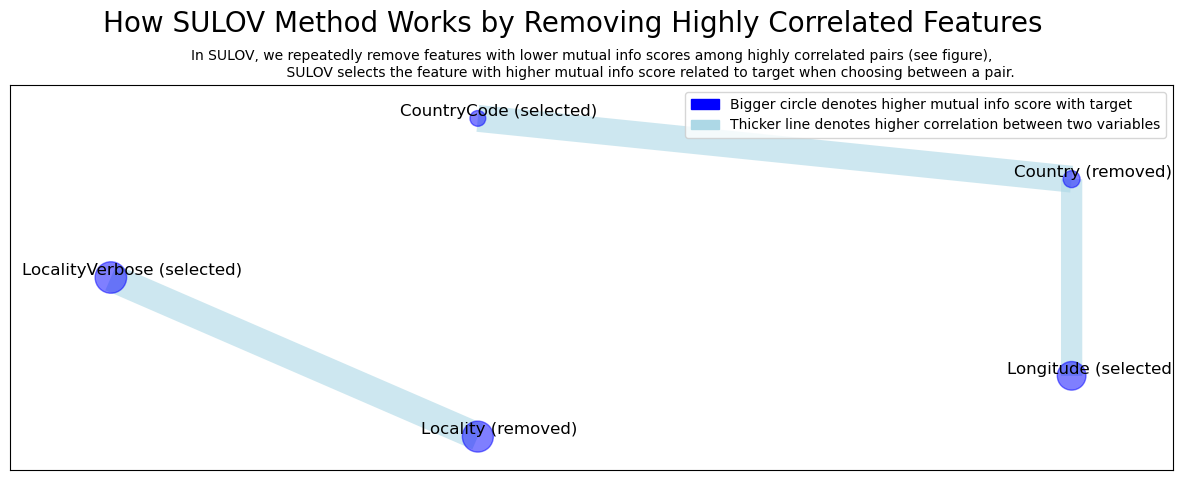

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 17
Final list of selected 17 vars after SULOV = ['Address', 'Aggregaterating', 'AverageCostfortwo', 'City', 'Cuisines', 'Currency', 'HasOnlinedelivery', 'HasTablebooking', 'Isdeliveringnow', 'Latitude', 'Ratingcolor', 'Ratingtext', 'RestaurantName', 'Votes', 'LocalityVerbose', 'Longitude', 'CountryCode']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 17 
    Taking top 4 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 17 variables...
            sel

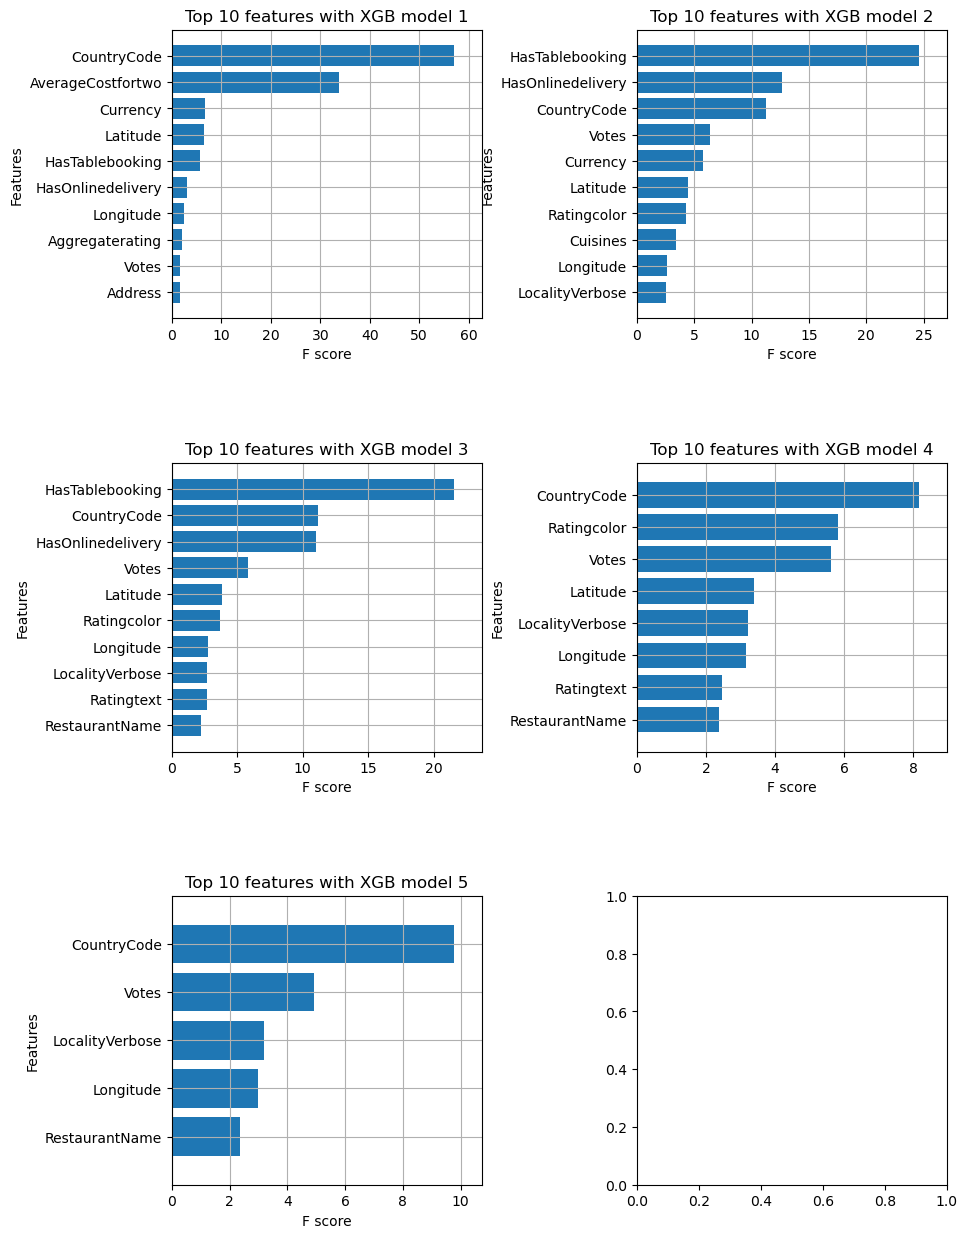

    Completed XGBoost feature selection in 1 seconds
    Alert: No ID variables ['RestaurantID'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 8 important features:
['CountryCode', 'AverageCostfortwo', 'Currency', 'Latitude', 'HasTablebooking', 'HasOnlinedelivery', 'Votes', 'Ratingcolor']
Total Time taken for featurewiz selection = 7 seconds
Output contains a list of 8 important features and a train dataframe


In [77]:
target = 'Price range'
 
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [78]:
# As you can see, Featurewiz selects 8 important features from the dataset. The Featurewiz instance returns two objects 

# Features - a list of selected features
# One dataframe - This dataframe contains only selected features and the target variable.
# Now you can train the models with selected features.

# Let see the list of selected features.

print(features)

['Country Code', 'Average Cost for two', 'Currency', 'Latitude', 'Has Table booking', 'Has Online delivery', 'Votes', 'Rating color']


In [79]:
df[features]

,Country Code,Average Cost for two,Currency,Latitude,Has Table booking,Has Online delivery,Votes,Rating color
0,1,850,4.0,27.161661,0.0,0.0,140,5.0
1,1,700,4.0,0.000000,0.0,0.0,71,5.0
2,1,500,4.0,27.160832,0.0,0.0,94,5.0
3,1,400,4.0,27.195928,0.0,0.0,87,1.0
4,1,1000,4.0,27.201725,0.0,0.0,177,1.0
...,...,...,...,...,...,...,...,...
9546,216,10,2.0,42.498400,0.0,0.0,101,5.0
9547,216,10,2.0,42.497919,0.0,0.0,58,5.0
9548,216,25,2.0,42.465580,0.0,0.0,156,5.0
9549,216,25,2.0,40.396043,0.0,0.0,156,5.0


In [84]:
#seperation
X=df[features]
Y=df['Price range']

In [85]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-3.06015126e-01, -2.16627430e-02,  2.43945338e-02, ...,
        -5.87546822e-01, -3.93115898e-02,  1.37116966e+00],
       [-3.06015126e-01, -3.09677582e-02,  2.43945338e-02, ...,
        -5.87546822e-01, -1.99722008e-01,  1.37116966e+00],
       [-3.06015126e-01, -4.33744451e-02,  2.43945338e-02, ...,
        -5.87546822e-01, -1.46251869e-01,  1.37116966e+00],
       ...,
       [ 3.48269305e+00, -7.28403265e-02, -2.16332558e+00, ...,
        -5.87546822e-01, -2.11497108e-03,  1.37116966e+00],
       [ 3.48269305e+00, -7.28403265e-02, -2.16332558e+00, ...,
        -5.87546822e-01, -2.11497108e-03,  1.37116966e+00],
       [ 3.48269305e+00, -7.28403265e-02, -2.16332558e+00, ...,
        -5.87546822e-01, -3.27585385e-01, -6.38247498e-01]])

In [86]:
#checking the shape
X_Scaled.shape

(9551, 8)

Now we shall treat the above shape as an array of numbers(tuple) where 1359 and 11 are the zeroth and first index respectively.

In [87]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [88]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 11. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7,8,9,10,) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [89]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

,vif,Features
0,1.095306,Country Code
1,1.020512,Average Cost for two
2,1.016079,Currency
3,1.044220,Latitude
4,1.047198,Has Table booking
5,1.057288,Has Online delivery
6,1.094780,Votes
7,1.063752,Rating color


From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption,there are no multicollinearity problems so we will proced with the above features

# Step 4.6 - Transforming Data to Remove Skewness using Power transformation

In [90]:
#rechecking for skewness...
X.skew()

Country Code             3.043965
Average Cost for two    35.477915
Currency                 2.858093
Latitude                -3.081635
Has Table booking        2.321100
Has Online delivery      1.114620
Votes                    8.807637
Rating color             0.046009
dtype: float64

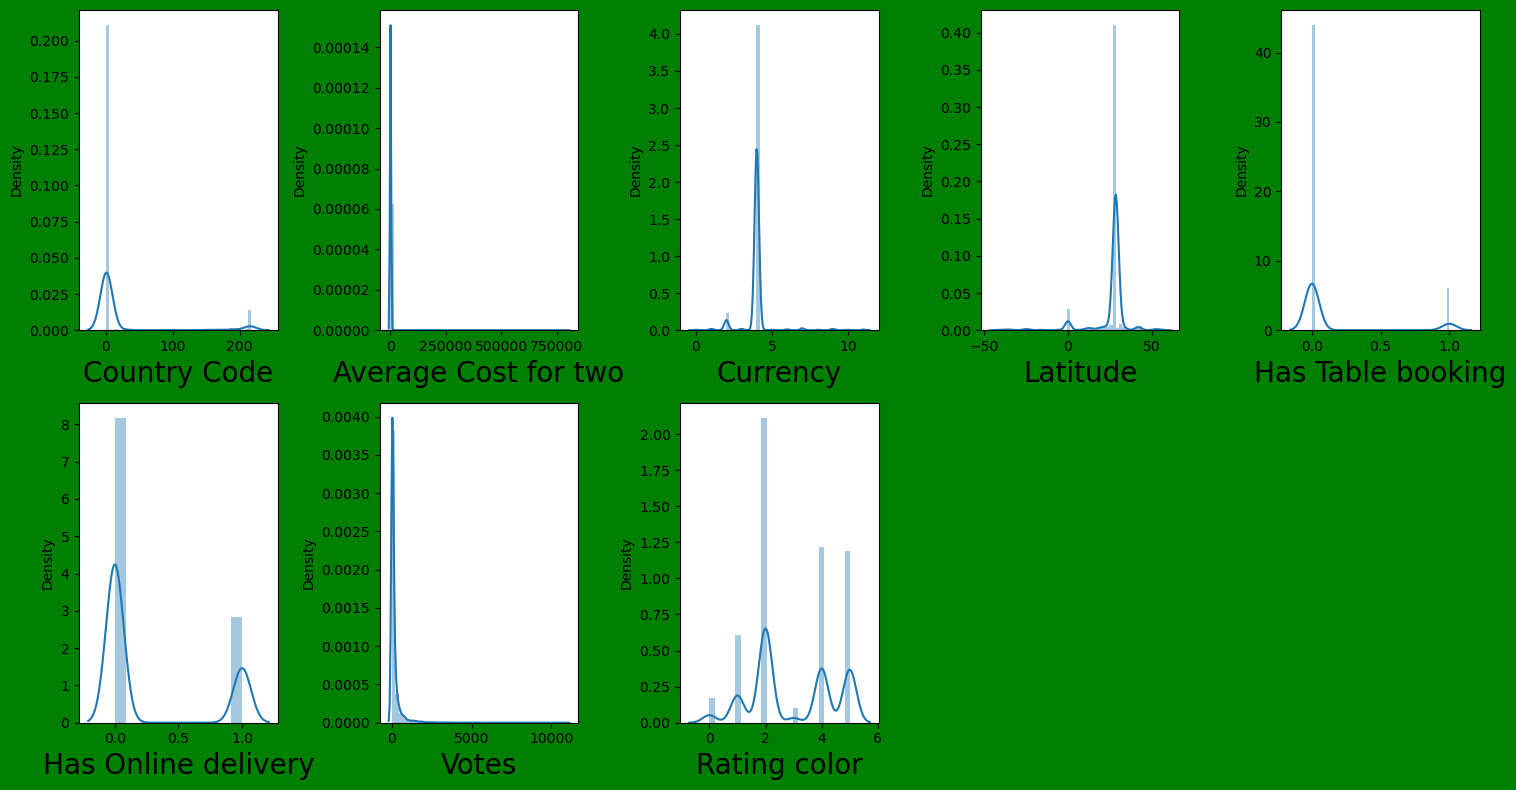

In [91]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in X:#triggering your for loop
    if plotnumber<=10:#since there are 6 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(X[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

Let lets go ahead and apply Power Transformation!

In [92]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [93]:
X.columns

Index(['Country Code', 'Average Cost for two', 'Currency', 'Latitude',
       'Has Table booking', 'Has Online delivery', 'Votes', 'Rating color'],
      dtype='object')

In [94]:
#extracting the columns that are skewed
data=['Votes','Latitude','Average Cost for two']

In [95]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
X[data] = scaler.fit_transform(X[data].values)

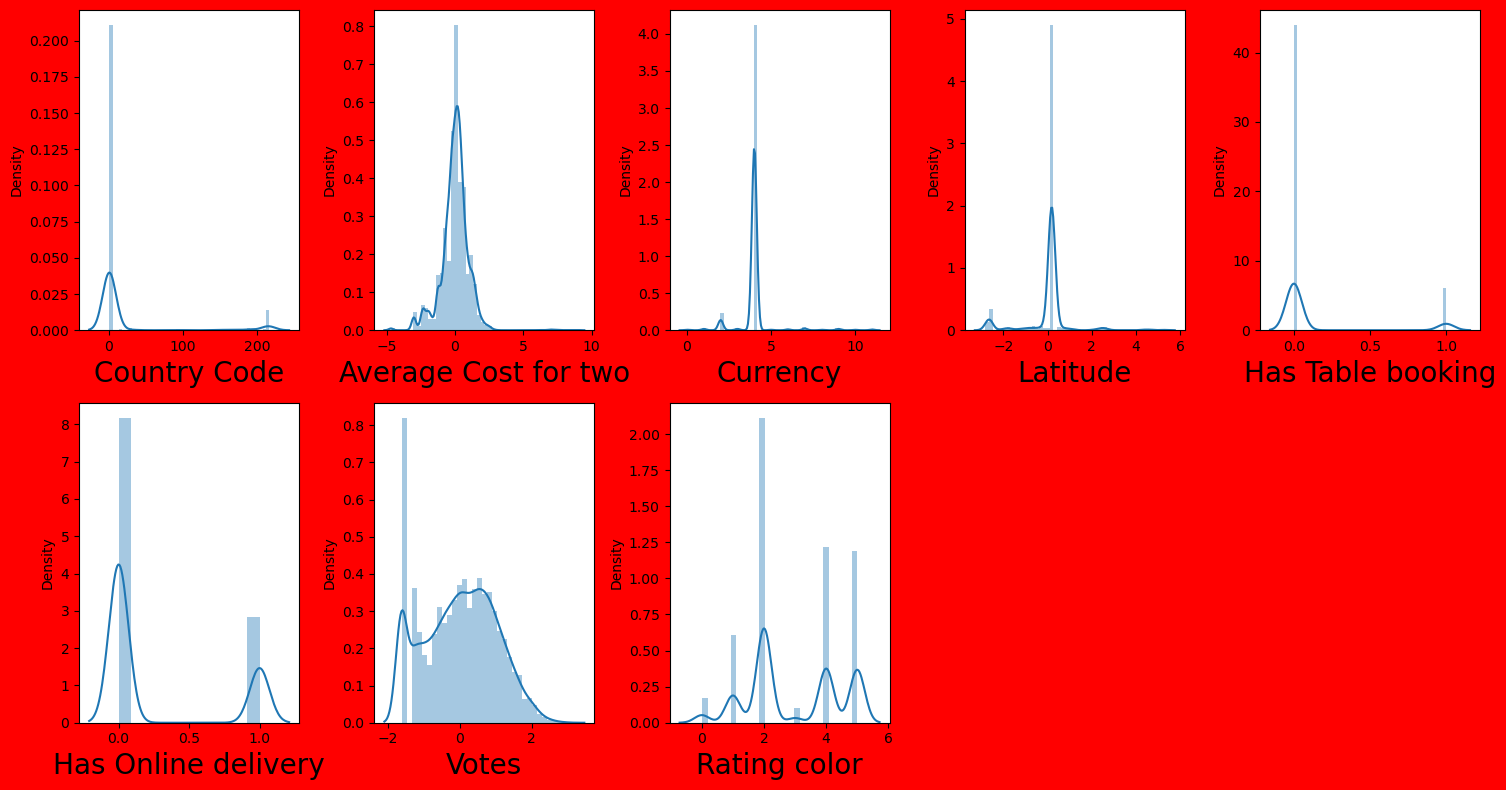

In [96]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in X:#triggering your for loop
    if plotnumber<=10:#since there are 6 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(X[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

From the above we can see that skewness has been removed!

# Step 4.7 - Seperating the datasets into X and Y variables

# Transforming data into standard normal distribution

In [97]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.30601513,  0.7213899 ,  0.02439453, ..., -0.58754682,
         0.79148481,  1.37116966],
       [-0.30601513,  0.53347473,  0.02439453, ..., -0.58754682,
         0.45845984,  1.37116966],
       [-0.30601513,  0.2130766 ,  0.02439453, ..., -0.58754682,
         0.59562488,  1.37116966],
       ...,
       [ 3.48269305, -2.34667073, -2.16332558, ..., -0.58754682,
         0.84489311,  1.37116966],
       [ 3.48269305, -2.34667073, -2.16332558, ..., -0.58754682,
         0.84489311,  1.37116966],
       [ 3.48269305, -2.34667073, -2.16332558, ..., -0.58754682,
        -0.25138855, -0.6382475 ]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [98]:
#reconfirming that mean is 0
X_Scaled.mean()

2.7525998558395673e-17

In [99]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Imbalancing of Target Variable

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


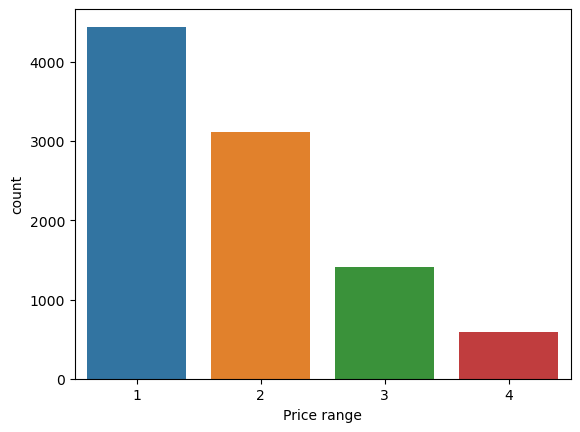

In [100]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='Price range',data=df)
print(df['Price range'].value_counts())

From the above graph we can see:

- the dependent variable has 4 classes of price range.
- there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State and Balancing Target Data(Oversampling)

In [101]:
#Using LogisticRegression to get the best Random state
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  86.6 and 87.4 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  85.9 and 87.5 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  86.5 and 87.9 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  87.3 and 87.6 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  86.9 and 87.7 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  87.8 and 87.2 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  87.8 and 87.9 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  87.4 and 87.2 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  88.1 and 87.7 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  87.6 and 87.3 respectively
At random state:- 10 Testing Accuracy and Training Accuracy are:-  86.

At random state:- 89 Testing Accuracy and Training Accuracy are:-  87.7 and 87.4 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  87.5 and 86.8 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  87.3 and 87.4 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  86.2 and 87.6 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  87.4 and 87.6 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  87.4 and 87.6 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  86.1 and 87.2 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  88.7 and 87.3 respectively
At random state:- 97 Testing Accuracy and Training Accuracy are:-  87.9 and 87.6 respectively
At random state:- 98 Testing Accuracy and Training Accuracy are:-  88.7 and 86.6 respectively
At random state:- 99 Testing Accuracy and Training Accuracy 

At random state:- 176 Testing Accuracy and Training Accuracy are:-  87.8 and 87.3 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  87.7 and 87.6 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  84.4 and 87.7 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  86.8 and 87.6 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  86.8 and 87.4 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  87.7 and 87.9 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  86.8 and 87.4 respectively
At random state:- 183 Testing Accuracy and Training Accuracy are:-  86.7 and 87.4 respectively
At random state:- 184 Testing Accuracy and Training Accuracy are:-  87.5 and 87.2 respectively
At random state:- 185 Testing Accuracy and Training Accuracy are:-  88.2 and 87.2 respectively
At random state:- 186 Testing Accuracy and Trainin

The best accuracy is 88.7% at random state 98

In [102]:
X_Scaled.shape

(9551, 8)

In [103]:
Y.shape

(9551,)

We have found best_random state value as 98. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=98,test_size=0.20)

In [105]:
x_train.shape

(7640, 8)

In [106]:
x_test.shape

(1911, 8)

In [107]:
y_train.shape

(7640,)

In [108]:
y_test.shape

(1911,)

# Training Model and Metrics Measurement

In [112]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  88.75
Confusion Matrix  [[867  35   0   0]
 [ 12 588  11   2]
 [  3  52 228   7]
 [  2   3  88  13]]
Classification Report                precision    recall  f1-score   support

           1       0.98      0.96      0.97       902
           2       0.87      0.96      0.91       613
           3       0.70      0.79      0.74       290
           4       0.59      0.12      0.20       106

    accuracy                           0.89      1911
   macro avg       0.78      0.71      0.71      1911
weighted avg       0.88      0.89      0.87      1911



LogisticRegression is producing good accuracy 88.75%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [113]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.79905808 0.81832461 0.80104712 0.81099476 0.62827225]
Cross Validation Score is  0.7715393656455737


# Difference between Accuracy Score and Cross Validation Score

In [114]:
Test_Accuracy_lr

0.8874934589220304

In [115]:
CV_Score_lr

0.7715393656455737

In [116]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.11595409327645667


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.115) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [119]:
#Using Decision tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  98.5 and 100.0 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  97.6 and 100.0 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  98.2 and 100.0 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  97.2 and 100.0 respectively
At random state:- 10 Testing Accuracy and Training Accuracy 

At random state:- 92 Testing Accuracy and Training Accuracy are:-  97.7 and 100.0 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  98.5 and 100.0 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  98.4 and 100.0 respectively
At random state:- 97 Testing Accuracy and Training Accuracy are:-  98.2 and 100.0 respectively
At random state:- 98 Testing Accuracy and Training Accuracy are:-  98.2 and 100.0 respectively
At random state:- 99 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 100 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 101 Testing Accuracy and Training Accuracy are:-  98.5 and 100.0 respectively
At random state:- 102 Testing Accuracy and Train

At random state:- 180 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 183 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 184 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 185 Testing Accuracy and Training Accuracy are:-  98.3 and 100.0 respectively
At random state:- 186 Testing Accuracy and Training Accuracy are:-  97.8 and 100.0 respectively
At random state:- 187 Testing Accuracy and Training Accuracy are:-  98.2 and 100.0 respectively
At random state:- 188 Testing Accuracy and Training Accuracy are:-  98.6 and 100.0 respectively
At random state:- 189 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 190 Testing Accuracy a

The best accuracy is 98.6% at random state 47

We have found best random state value as 47. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [126]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=47,test_size=0.20)

In [127]:
x_train.shape

(7640, 8)

In [128]:
x_test.shape

(1911, 8)

In [129]:
y_train.shape

(7640,)

In [130]:
y_test.shape

(1911,)

# Training Model and Metrics Measurement

In [131]:
dt=LogisticRegression()
dt.fit(x_train,y_train)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  87.96
Confusion Matrix  [[861  29   0   0]
 [ 18 578  13   1]
 [  1  51 230  11]
 [  6   1  99  12]]
Classification Report                precision    recall  f1-score   support

           1       0.97      0.97      0.97       890
           2       0.88      0.95      0.91       610
           3       0.67      0.78      0.72       293
           4       0.50      0.10      0.17       118

    accuracy                           0.88      1911
   macro avg       0.76      0.70      0.69      1911
weighted avg       0.87      0.88      0.86      1911



Decision Tree Model is producing good accuracy - 87.96%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [132]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.79905808 0.81832461 0.80104712 0.81099476 0.62827225]
Cross Validation Score is  0.7715393656455737


# Difference between Accuracy Score and Cross Validation Score

In [133]:
Test_Accuracy_dt

0.879644165358451

In [134]:
CV_Score_dt

0.7715393656455737

In [135]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.10810479971287734


From the above you can see that difference between Accuracy and Cross Validation score is low(0.108) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.3 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [137]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  97.4 and 100.0 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  97.7 and 100.0 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  97.8 and 100.0 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  97.2 and 100.0 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  97.4 and 100.0 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  97.8 and 100.0 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  97.0 and 100.0 respectively
At random state:- 10 Testing Accuracy and Training Accuracy 

At random state:- 87 Testing Accuracy and Training Accuracy are:-  97.2 and 100.0 respectively
At random state:- 88 Testing Accuracy and Training Accuracy are:-  97.2 and 100.0 respectively
At random state:- 89 Testing Accuracy and Training Accuracy are:-  97.6 and 100.0 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  98.2 and 100.0 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  97.8 and 100.0 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  97.7 and 100.0 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  97.1 and 100.0 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 97 Testing Accuracy and Training

At random state:- 173 Testing Accuracy and Training Accuracy are:-  97.9 and 100.0 respectively
At random state:- 174 Testing Accuracy and Training Accuracy are:-  97.7 and 100.0 respectively
At random state:- 175 Testing Accuracy and Training Accuracy are:-  97.1 and 100.0 respectively
At random state:- 176 Testing Accuracy and Training Accuracy are:-  97.6 and 100.0 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  97.6 and 100.0 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  97.7 and 100.0 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  98.0 and 100.0 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  97.5 and 100.0 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  98.1 and 100.0 respectively
At random state:- 183 Testing Accuracy a

The best accuracy is 98.3% at random state 101

We have found best_random state value as 101. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [138]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=101,test_size=0.20)

# Training Model and Metrics Measurement

In [139]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  98.38
Confusion Matrix  [[870   2   0   0]
 [  1 614   5   0]
 [  0   8 277   5]
 [  0   0  10 119]]
Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00       872
           2       0.98      0.99      0.99       620
           3       0.95      0.96      0.95       290
           4       0.96      0.92      0.94       129

    accuracy                           0.98      1911
   macro avg       0.97      0.97      0.97      1911
weighted avg       0.98      0.98      0.98      1911



RandomForest Classifier is producing good accuracy = 98.38%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [140]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.95081109 0.97225131 0.99842932 0.9460733  0.63350785]
Cross Validation Score is  0.9002145747545895


# Difference between Accuracy Score and Cross Validation Score

In [141]:
Test_Accuracy_rf

0.9837781266352695

In [142]:
CV_Score_rf

0.9002145747545895

In [143]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08356355188067999


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.08356) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [144]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  89.4 and 89.3 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.3 and 83.0 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  82.6 and 83.3 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  89.4 and 90.0 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  79.9 and 79.8 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  90.5 and 89.7 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  79.8 and 79.9 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  78.9 and 78.9 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  84.2 and 82.9 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  82.3 and 83.9 respectively
At random state:- 10 Testing Accuracy and Training Accuracy are:-  83.

At random state:- 88 Testing Accuracy and Training Accuracy are:-  77.9 and 77.2 respectively
At random state:- 89 Testing Accuracy and Training Accuracy are:-  83.6 and 83.6 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  83.2 and 83.0 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  91.8 and 91.6 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  84.1 and 84.3 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  81.6 and 82.1 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  82.3 and 83.4 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  89.3 and 89.8 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  85.3 and 84.5 respectively
At random state:- 97 Testing Accuracy and Training Accuracy are:-  89.5 and 90.0 respectively
At random state:- 98 Testing Accuracy and Training Accuracy 

At random state:- 175 Testing Accuracy and Training Accuracy are:-  78.3 and 79.9 respectively
At random state:- 176 Testing Accuracy and Training Accuracy are:-  82.8 and 83.2 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  84.8 and 84.7 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  82.2 and 83.8 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  77.8 and 78.1 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  78.4 and 78.2 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  83.4 and 83.0 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  79.4 and 79.5 respectively
At random state:- 183 Testing Accuracy and Training Accuracy are:-  83.0 and 83.0 respectively
At random state:- 184 Testing Accuracy and Training Accuracy are:-  78.3 and 77.1 respectively
At random state:- 185 Testing Accuracy and Trainin

The best accuracy 91.50% at random state 157

We have found best_random state value as 157. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=157,test_size=0.20)

# Training Model and Metrics Measurement

In [146]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  91.52
Confusion Matrix  [[881  26   0   0]
 [ 11 600   8   5]
 [  0  18 231  22]
 [  0   0  72  37]]
Classification Report                precision    recall  f1-score   support

           1       0.99      0.97      0.98       907
           2       0.93      0.96      0.95       624
           3       0.74      0.85      0.79       271
           4       0.58      0.34      0.43       109

    accuracy                           0.92      1911
   macro avg       0.81      0.78      0.79      1911
weighted avg       0.91      0.92      0.91      1911



AdaBoostClassifier is producing good accuracy = 91.523%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [147]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.89900576 0.78062827 0.85235602 0.91832461 0.60418848]
Cross Validation Score is  0.8109006276695133


# Difference between Accuracy Score and Cross Validation Score

In [148]:
Test_Accuracy_ada

0.9152276295133438

In [149]:
CV_Score_ada

0.8109006276695133

In [150]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.10432700184383048


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.104) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# Step 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [151]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  97.5 and 98.8 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  97.7 and 98.8 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  97.6 and 98.8 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  97.3 and 98.9 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  98.0 and 98.9 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  97.4 and 98.7 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  97.6 and 98.9 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  97.9 and 98.8 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  98.0 and 98.7 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  96.8 and 98.9 respectively
At random state:- 10 Testing Accuracy and Training Accuracy are:-  97.

At random state:- 88 Testing Accuracy and Training Accuracy are:-  97.6 and 98.8 respectively
At random state:- 89 Testing Accuracy and Training Accuracy are:-  97.5 and 98.9 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  98.6 and 98.8 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  97.8 and 98.7 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  97.4 and 98.8 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  97.9 and 98.9 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  97.7 and 98.8 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  97.1 and 98.8 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  97.9 and 98.9 respectively
At random state:- 97 Testing Accuracy and Training Accuracy are:-  98.1 and 98.8 respectively
At random state:- 98 Testing Accuracy and Training Accuracy 

At random state:- 175 Testing Accuracy and Training Accuracy are:-  97.4 and 98.8 respectively
At random state:- 176 Testing Accuracy and Training Accuracy are:-  97.5 and 98.7 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  97.7 and 98.7 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  97.3 and 98.8 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  97.3 and 98.8 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  98.0 and 98.7 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  97.3 and 98.8 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  98.0 and 98.8 respectively
At random state:- 183 Testing Accuracy and Training Accuracy are:-  97.7 and 98.9 respectively
At random state:- 184 Testing Accuracy and Training Accuracy are:-  97.9 and 98.8 respectively
At random state:- 185 Testing Accuracy and Trainin

The best accuracy is 98.40% at random state 81

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [152]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

# Training Model and Metrics Measurement

In [153]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  98.43
Confusion Matrix  [[904   3   0   0]
 [  6 604   3   0]
 [  0   9 264   2]
 [  0   0   7 109]]
Classification Report                precision    recall  f1-score   support

           1       0.99      1.00      1.00       907
           2       0.98      0.99      0.98       613
           3       0.96      0.96      0.96       275
           4       0.98      0.94      0.96       116

    accuracy                           0.98      1911
   macro avg       0.98      0.97      0.98      1911
weighted avg       0.98      0.98      0.98      1911



GradientBoosting Classifier is producing good accuracy = 98.43%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [154]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.94819466 0.97696335 0.99895288 0.93979058 0.63298429]
Cross Validation Score is  0.8993771523913633


# Difference between Accuracy Score and Cross Validation Score

In [155]:
Test_Accuracy_gb

0.9843014128728415

In [156]:
CV_Score_gb

0.8993771523913633

In [157]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08492426048147816


From the above you can see that difference between Accuracy and Cross Validation score is low(0.085) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.6 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [170]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  96.6 and 100.0 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  96.4 and 100.0 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  97.0 and 100.0 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  96.2 and 100.0 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  95.6 and 100.0 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  95.9 and 100.0 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  96.5 and 100.0 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  96.7 and 100.0 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  96.0 and 100.0 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  95.3 and 100.0 respectively
At random state:- 10 Testing Accuracy and Training Accuracy 

At random state:- 87 Testing Accuracy and Training Accuracy are:-  95.6 and 100.0 respectively
At random state:- 88 Testing Accuracy and Training Accuracy are:-  96.3 and 100.0 respectively
At random state:- 89 Testing Accuracy and Training Accuracy are:-  96.3 and 100.0 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  96.1 and 100.0 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  96.2 and 100.0 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  96.1 and 100.0 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  96.3 and 100.0 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  96.6 and 100.0 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  96.4 and 100.0 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  97.0 and 100.0 respectively
At random state:- 97 Testing Accuracy and Training

At random state:- 173 Testing Accuracy and Training Accuracy are:-  96.7 and 100.0 respectively
At random state:- 174 Testing Accuracy and Training Accuracy are:-  96.6 and 100.0 respectively
At random state:- 175 Testing Accuracy and Training Accuracy are:-  95.8 and 100.0 respectively
At random state:- 176 Testing Accuracy and Training Accuracy are:-  96.5 and 100.0 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  96.3 and 100.0 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  95.9 and 100.0 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  96.5 and 100.0 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  96.9 and 100.0 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  96.0 and 100.0 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  96.0 and 100.0 respectively
At random state:- 183 Testing Accuracy a

The best accuracy is 97.5% at random state 47

We have found best_random state value as 47. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=47,test_size=0.20)

# Training Model and Metrics Measurement

In [172]:
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  97.23
Confusion Matrix  [[886   4   0   0]
 [  3 596  11   0]
 [  0  13 270  10]
 [  0   1  11 106]]
Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00       890
           2       0.97      0.98      0.97       610
           3       0.92      0.92      0.92       293
           4       0.91      0.90      0.91       118

    accuracy                           0.97      1911
   macro avg       0.95      0.95      0.95      1911
weighted avg       0.97      0.97      0.97      1911



ExtraTress Classifier is producing good accuracy = 97.23%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [173]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.93563579 0.95602094 0.98743455 0.92827225 0.62094241]
Cross Validation Score is  0.8856611899693426


# Difference between Accuracy Score and Cross Validation Score

In [174]:
Test_Accuracy_ex

0.9722658294086866

In [175]:
CV_Score_ex

0.8856611899693426

In [176]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.08660463943934393


From the above you can see that difference between Accuracy and Cross Validation score is low(0.086) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [177]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train,pred_train)*100,1), "respectively")

At random state:- 0 Testing Accuracy and Training Accuracy are:-  93.2 and 93.7 respectively
At random state:- 1 Testing Accuracy and Training Accuracy are:-  91.8 and 93.1 respectively
At random state:- 2 Testing Accuracy and Training Accuracy are:-  92.7 and 94.1 respectively
At random state:- 3 Testing Accuracy and Training Accuracy are:-  92.6 and 93.5 respectively
At random state:- 4 Testing Accuracy and Training Accuracy are:-  91.0 and 93.1 respectively
At random state:- 5 Testing Accuracy and Training Accuracy are:-  92.4 and 93.5 respectively
At random state:- 6 Testing Accuracy and Training Accuracy are:-  93.0 and 93.3 respectively
At random state:- 7 Testing Accuracy and Training Accuracy are:-  93.1 and 93.2 respectively
At random state:- 8 Testing Accuracy and Training Accuracy are:-  92.9 and 93.3 respectively
At random state:- 9 Testing Accuracy and Training Accuracy are:-  91.8 and 93.6 respectively
At random state:- 10 Testing Accuracy and Training Accuracy are:-  93.

At random state:- 88 Testing Accuracy and Training Accuracy are:-  91.4 and 93.0 respectively
At random state:- 89 Testing Accuracy and Training Accuracy are:-  93.0 and 93.6 respectively
At random state:- 90 Testing Accuracy and Training Accuracy are:-  93.6 and 93.7 respectively
At random state:- 91 Testing Accuracy and Training Accuracy are:-  91.9 and 93.0 respectively
At random state:- 92 Testing Accuracy and Training Accuracy are:-  92.9 and 93.7 respectively
At random state:- 93 Testing Accuracy and Training Accuracy are:-  93.1 and 93.4 respectively
At random state:- 94 Testing Accuracy and Training Accuracy are:-  92.0 and 92.8 respectively
At random state:- 95 Testing Accuracy and Training Accuracy are:-  91.6 and 93.3 respectively
At random state:- 96 Testing Accuracy and Training Accuracy are:-  92.4 and 93.4 respectively
At random state:- 97 Testing Accuracy and Training Accuracy are:-  92.6 and 93.9 respectively
At random state:- 98 Testing Accuracy and Training Accuracy 

At random state:- 175 Testing Accuracy and Training Accuracy are:-  92.3 and 93.5 respectively
At random state:- 176 Testing Accuracy and Training Accuracy are:-  92.3 and 93.2 respectively
At random state:- 177 Testing Accuracy and Training Accuracy are:-  92.7 and 94.0 respectively
At random state:- 178 Testing Accuracy and Training Accuracy are:-  90.8 and 93.8 respectively
At random state:- 179 Testing Accuracy and Training Accuracy are:-  92.1 and 93.4 respectively
At random state:- 180 Testing Accuracy and Training Accuracy are:-  92.8 and 93.6 respectively
At random state:- 181 Testing Accuracy and Training Accuracy are:-  91.3 and 92.9 respectively
At random state:- 182 Testing Accuracy and Training Accuracy are:-  92.2 and 92.9 respectively
At random state:- 183 Testing Accuracy and Training Accuracy are:-  91.8 and 93.5 respectively
At random state:- 184 Testing Accuracy and Training Accuracy are:-  92.0 and 93.8 respectively
At random state:- 185 Testing Accuracy and Trainin

The best accuracy is 93.80% at random state 98

We have found best_random state value as 98. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=98,test_size=0.20)

# Training Model and Metrics Measurement

In [180]:
sv=GradientBoostingClassifier()
sv.fit(x_train,y_train)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  98.01
Confusion Matrix  [[896   6   0   0]
 [  2 608   3   0]
 [  0  14 269   7]
 [  0   0   6 100]]
Classification Report                precision    recall  f1-score   support

           1       1.00      0.99      1.00       902
           2       0.97      0.99      0.98       613
           3       0.97      0.93      0.95       290
           4       0.93      0.94      0.94       106

    accuracy                           0.98      1911
   macro avg       0.97      0.96      0.97      1911
weighted avg       0.98      0.98      0.98      1911



Support Vector is producing good accuracy = 98%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [181]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.94819466 0.97696335 0.99895288 0.93979058 0.63298429]
Cross Validation Score is  0.8993771523913633


# Difference between Accuracy Score and Cross Validation Score

In [182]:
Test_Accuracy_sv

0.9801151229722659

In [183]:
CV_Score_sv

0.8993771523913633

In [184]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0807379705809026


From the above you can see that difference between Accuracy and Cross Validation score is low(0.080) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 7 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [188]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier','Extra Trees Classifer','Support Vector Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.887493,0.771539,0.115954
1,Decision Tree Classifier,0.879644,0.771539,0.108105
2,Random Forest Classifier,0.983778,0.900215,0.083564
3,Ada Boosting Classifier,0.915228,0.810901,0.104327
4,Gradient Boosting Classifier,0.984301,0.899377,0.084924
5,Extra Trees Classifer,0.972266,0.885661,0.086605
6,Support Vector Classifier,0.980115,0.899377,0.080738


In [189]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,88.75,77.15,0.115954
1,Decision Tree Classifier,87.96,77.15,0.108105
2,Random Forest Classifier,98.38,90.02,0.083564
3,Ada Boosting Classifier,91.52,81.09,0.104327
4,Gradient Boosting Classifier,98.43,89.94,0.084924
5,Extra Trees Classifer,97.23,88.57,0.086605
6,Support Vector Classifier,98.01,89.94,0.080738


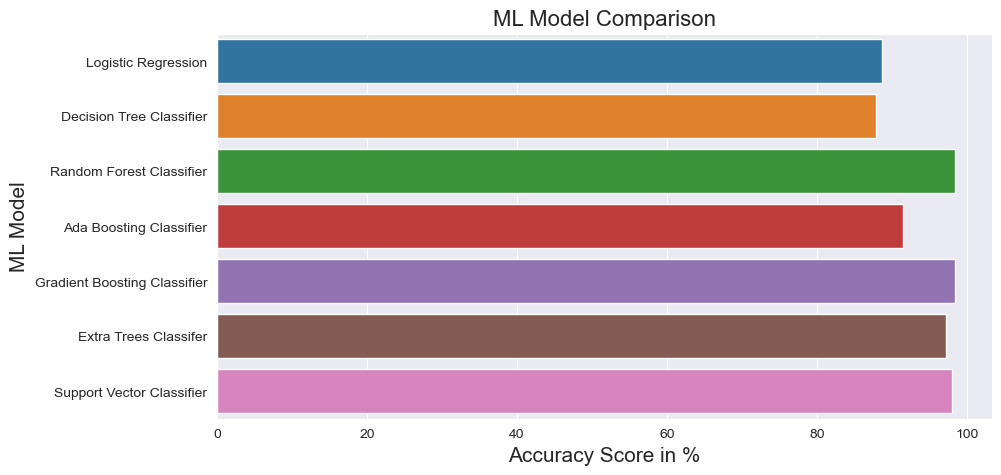

In [190]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that gradient boosting(98.43%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

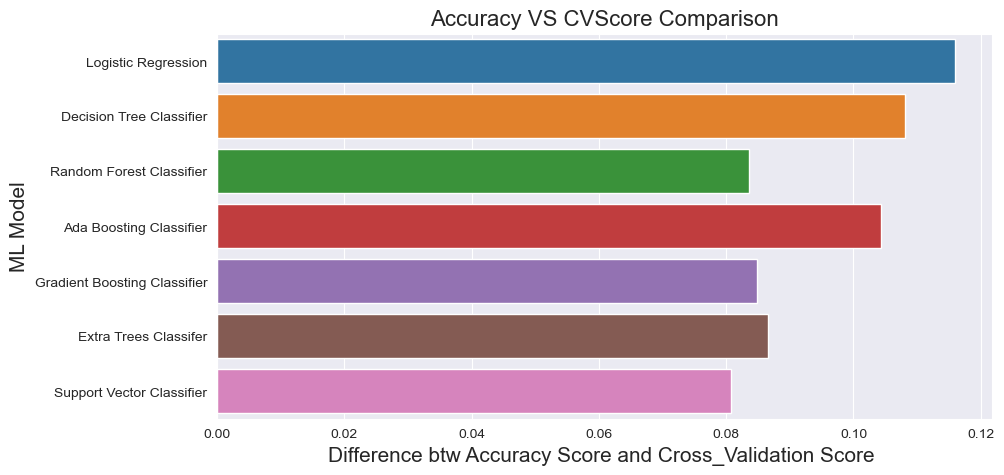

In [191]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is support vector Classifier!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
 - The Model with least difference is support vector Classifer but we will go with gradient boosting classifier because the difference is almost close to svc and the accuracy is higher

# Hence Optimum Machine Model Chosen = gradient Boost Classifer!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [195]:
parameter_grid={'learning_rate':[0.15,0.1,0.05,0.01,0.005], 'n_estimators':[100,250,500,750]}

In [196]:
#Gridsearch
gridsearch = GridSearchCV(gb, parameter_grid, cv=3,scoring="accuracy")
gridsearch.fit(x_train, y_train);

In [197]:
#Get best hyperparameters
gridsearch.best_params_

{'learning_rate': 0.1, 'n_estimators': 750}

Now lets use the best parameters.....

In [198]:
#Instantiating using the best parameters...
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=750)

In [199]:
#fitting the model...
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=750)

In [217]:
pred_test=gb.predict(x_test)

In [218]:
accuracy_score(y_test,pred_test)

0.9848246991104134

# Step 8 - ROC AUC PLOT

-The project is a multi classification problem and roc auc plot is for binary classification problem.

-In this case we are not visualising the roc auc curve

# Lets predict for the Average Cost for two
# This is a regression problem

In [1]:
X.columns

NameError: name 'X' is not defined

In [234]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [239]:
X_act['Price range'] = df['Price range']

In [241]:
X_act

,Country Code,Currency,Latitude,Has Table booking,Has Online delivery,Votes,Rating color,Price range
0,1,4.0,-0.019668,0.0,0.0,0.791485,5.0,3
1,1,4.0,-2.614712,0.0,0.0,0.458460,5.0,2
2,1,4.0,-0.019789,0.0,0.0,0.595625,5.0,2
3,1,4.0,-0.014668,0.0,0.0,0.557725,1.0,2
4,1,4.0,-0.013822,0.0,0.0,0.907323,1.0,3
...,...,...,...,...,...,...,...,...
9546,216,2.0,2.544512,0.0,0.0,0.630847,5.0,1
9547,216,2.0,2.544422,0.0,0.0,0.360098,5.0,1
9548,216,2.0,2.538368,0.0,0.0,0.844893,5.0,2
9549,216,2.0,2.156342,0.0,0.0,0.844893,5.0,2


In [244]:
scale = StandardScaler()

X_scale_act = scale.fit_transform(X_act)

In [242]:
Y_act = df['Average Cost for two']

# Step 5 - MODEL BUILDING

# Step 5.1 - Linear Regression

In [245]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scale_act,Y_act,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  -8.05 and 2.54 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1883.66 and 2346.83 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  36505532.53 and 2346.83 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  6041.98 and 48.44 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  1.67 and 2.59 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1998.3 and 2040.46 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  356815598.27 and 2040.46 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  18889.56 and 45.17 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  2.49 and 2.3 respectively
At random state 

At random state of :- 19 Testing Accuracy and Training Accuracy are:-  1.28 and 2.73 respectively
At random state of :-  19 the mean absolute error of Testing and Training are:-  1963.93 and 2060.96 respectively
At random state of :-  19 the mean squared error of Testing and Training are:-  350775205.15 and 2060.96 respectively
At random state of :-  19 the root mean squared error of Testing and Training are:-  18728.99 and 45.4 respectively


At random state of :- 20 Testing Accuracy and Training Accuracy are:-  2.07 and 2.37 respectively
At random state of :-  20 the mean absolute error of Testing and Training are:-  2032.53 and 2123.52 respectively
At random state of :-  20 the mean squared error of Testing and Training are:-  172355796.66 and 2123.52 respectively
At random state of :-  20 the root mean squared error of Testing and Training are:-  13128.43 and 46.08 respectively


At random state of :- 21 Testing Accuracy and Training Accuracy are:-  3.68 and 2.04 respectively
At ra

At random state of :- 39 Testing Accuracy and Training Accuracy are:-  -3.62 and 2.51 respectively
At random state of :-  39 the mean absolute error of Testing and Training are:-  1842.17 and 2312.97 respectively
At random state of :-  39 the mean squared error of Testing and Training are:-  48785058.47 and 2312.97 respectively
At random state of :-  39 the root mean squared error of Testing and Training are:-  6984.63 and 48.09 respectively


At random state of :- 40 Testing Accuracy and Training Accuracy are:-  2.61 and 1.98 respectively
At random state of :-  40 the mean absolute error of Testing and Training are:-  2323.41 and 1629.88 respectively
At random state of :-  40 the mean squared error of Testing and Training are:-  484258873.39 and 1629.88 respectively
At random state of :-  40 the root mean squared error of Testing and Training are:-  22005.88 and 40.37 respectively


At random state of :- 41 Testing Accuracy and Training Accuracy are:-  1.61 and 2.62 respectively
At ra

At random state of :- 76 Testing Accuracy and Training Accuracy are:-  2.85 and 2.27 respectively
At random state of :-  76 the mean absolute error of Testing and Training are:-  2140.05 and 2119.01 respectively
At random state of :-  76 the mean squared error of Testing and Training are:-  134078016.71 and 2119.01 respectively
At random state of :-  76 the root mean squared error of Testing and Training are:-  11579.21 and 46.03 respectively


At random state of :- 77 Testing Accuracy and Training Accuracy are:-  2.17 and 2.39 respectively
At random state of :-  77 the mean absolute error of Testing and Training are:-  1983.37 and 1896.77 respectively
At random state of :-  77 the mean squared error of Testing and Training are:-  381545077.29 and 1896.77 respectively
At random state of :-  77 the root mean squared error of Testing and Training are:-  19533.18 and 43.55 respectively


At random state of :- 78 Testing Accuracy and Training Accuracy are:-  2.04 and 2.46 respectively
At r

At random state of :- 96 Testing Accuracy and Training Accuracy are:-  4.15 and 2.2 respectively
At random state of :-  96 the mean absolute error of Testing and Training are:-  1835.45 and 2148.82 respectively
At random state of :-  96 the mean squared error of Testing and Training are:-  83323147.1 and 2148.82 respectively
At random state of :-  96 the root mean squared error of Testing and Training are:-  9128.15 and 46.36 respectively


At random state of :- 97 Testing Accuracy and Training Accuracy are:-  2.36 and 2.04 respectively
At random state of :-  97 the mean absolute error of Testing and Training are:-  2236.27 and 1577.5 respectively
At random state of :-  97 the mean squared error of Testing and Training are:-  561018188.12 and 1577.5 respectively
At random state of :-  97 the root mean squared error of Testing and Training are:-  23685.82 and 39.72 respectively


At random state of :- 98 Testing Accuracy and Training Accuracy are:-  -0.52 and 2.61 respectively
At random

At random state of :- 131 Testing Accuracy and Training Accuracy are:-  2.35 and 2.01 respectively
At random state of :-  131 the mean absolute error of Testing and Training are:-  2231.35 and 1546.32 respectively
At random state of :-  131 the mean squared error of Testing and Training are:-  562247013.8 and 1546.32 respectively
At random state of :-  131 the root mean squared error of Testing and Training are:-  23711.75 and 39.32 respectively


At random state of :- 132 Testing Accuracy and Training Accuracy are:-  3.2 and 1.8 respectively
At random state of :-  132 the mean absolute error of Testing and Training are:-  2389.87 and 1673.51 respectively
At random state of :-  132 the mean squared error of Testing and Training are:-  381371224.07 and 1673.51 respectively
At random state of :-  132 the root mean squared error of Testing and Training are:-  19528.73 and 40.91 respectively


At random state of :- 133 Testing Accuracy and Training Accuracy are:-  1.63 and 2.09 respectivel

At random state of :- 170 Testing Accuracy and Training Accuracy are:-  -1.74 and 2.49 respectively
At random state of :-  170 the mean absolute error of Testing and Training are:-  1964.09 and 2266.91 respectively
At random state of :-  170 the mean squared error of Testing and Training are:-  63765676.74 and 2266.91 respectively
At random state of :-  170 the root mean squared error of Testing and Training are:-  7985.34 and 47.61 respectively


At random state of :- 171 Testing Accuracy and Training Accuracy are:-  3.97 and 1.89 respectively
At random state of :-  171 the mean absolute error of Testing and Training are:-  2226.63 and 1877.97 respectively
At random state of :-  171 the mean squared error of Testing and Training are:-  240469657.22 and 1877.97 respectively
At random state of :-  171 the root mean squared error of Testing and Training are:-  15507.08 and 43.34 respectively


At random state of :- 172 Testing Accuracy and Training Accuracy are:-  2.31 and 2.34 respectiv

In [220]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Step 9 - MODEL SAVING

In [219]:
filename='Machine_Model_zomato'
pickle.dump(gb,open(filename,'wb'))